In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges is object type hence convert to numerical

In [5]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

- check for missing values

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [7]:
df['TotalCharges'].isnull().sum()

np.int64(11)

- There are 11 null values

In [8]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- now i have 4 numerical columns

In [11]:
numeric_cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

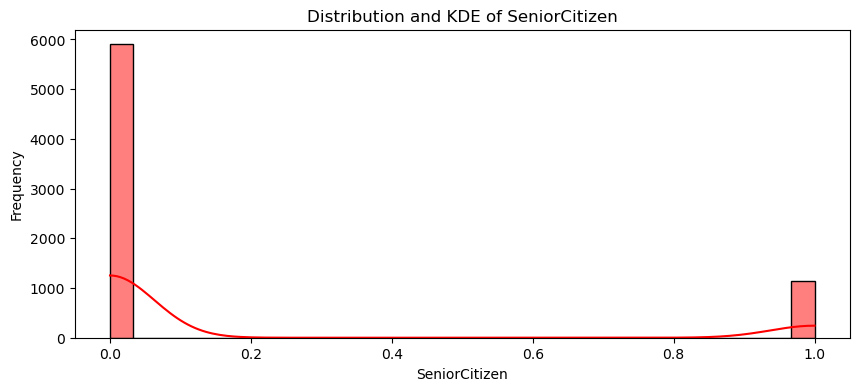

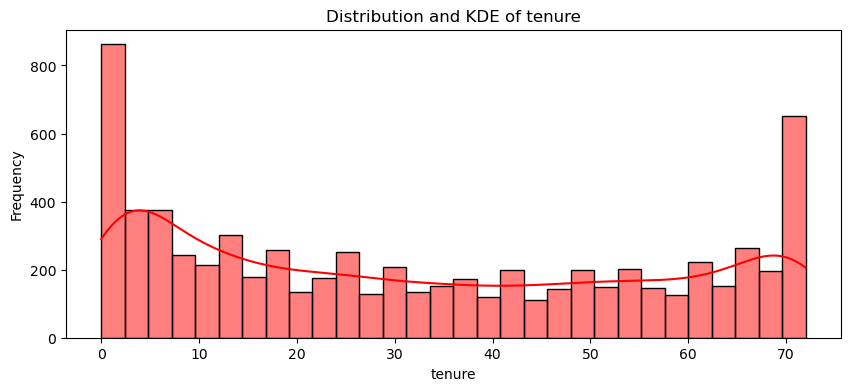

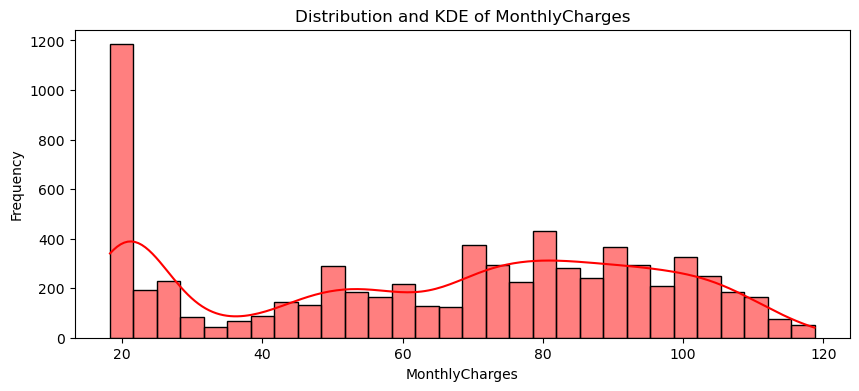

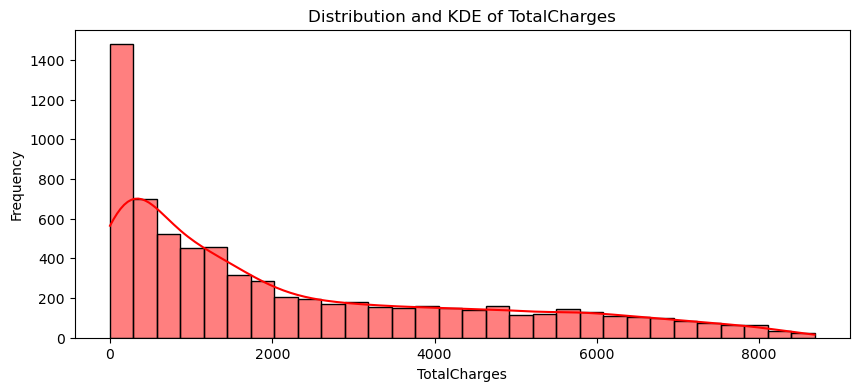

In [12]:
for col in numeric_cols: 
    plt.figure(figsize=(10,4))
    sns.histplot(df[col].dropna(),kde=True,bins=30,color='red') 
    plt.title(f"Distribution and KDE of {col}")
    plt.xlabel(col) 
    plt.ylabel("Frequency")
    plt.show()

### Observations

#### Tenure
- High frequency at **low tenure** indicates that the company is successful in acquiring new customers.  
- However, it could also **hide a high early churn rate** if many new customers leave shortly after joining.  
- Low frequency at **high tenure** suggests that **few customers stay long-term**, indicating potential retention challenges.  

#### MonthlyCharges
- There is a **peak at low monthly charges**.  
- Different **customer groups exhibit different churn drivers**, implying the need for segment-specific retention strategies.  

#### TotalCharges
- The distribution is **right-skewed**.  
- There is a **strong correlation between TotalCharges and Tenure**.  
- A **high peak near 0** represents **new customers with low tenure and low TotalCharges**.  
- The **long tail** indicates **few high-value, long-term customers**.  
- Understanding this distribution can help **define what qualifies as a high-value customer** for **targeted retention efforts**.  


In [13]:
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()

In [14]:
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

In [15]:
df['Dependents'].value_counts().index

Index(['No', 'Yes'], dtype='object', name='Dependents')

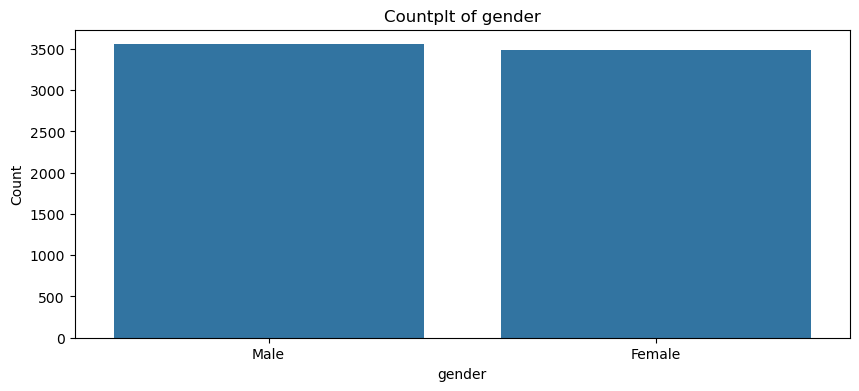

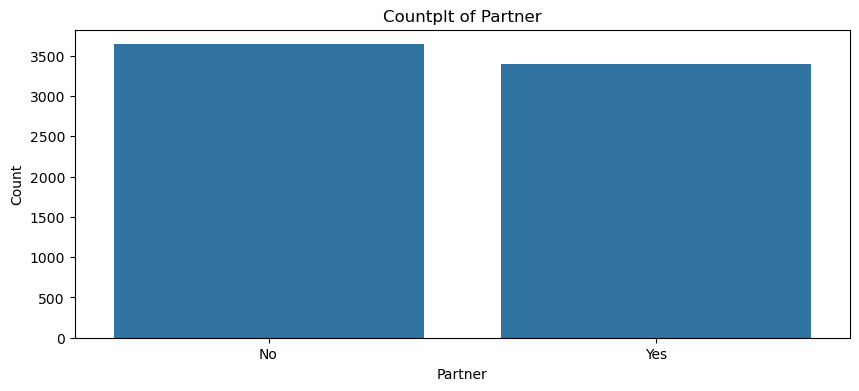

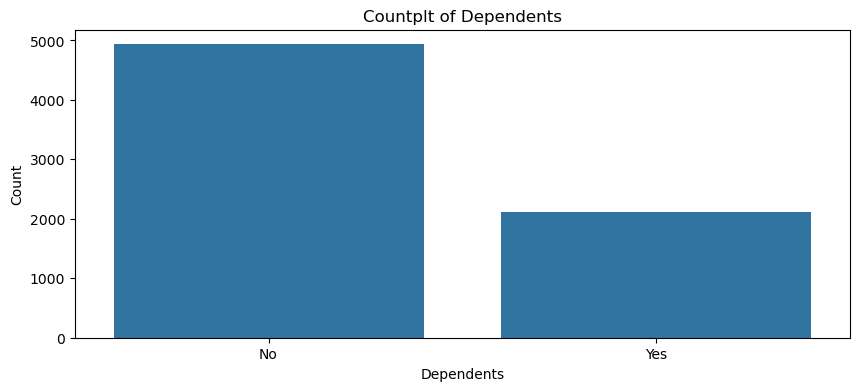

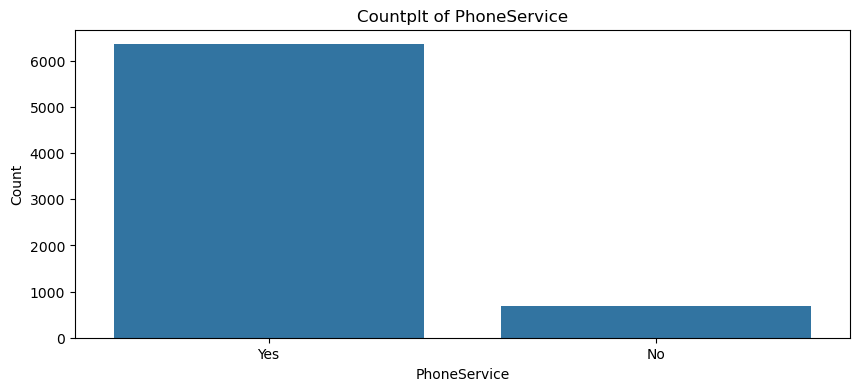

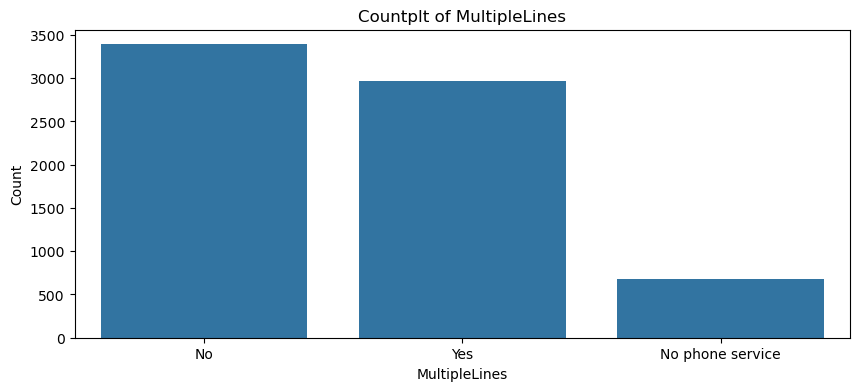

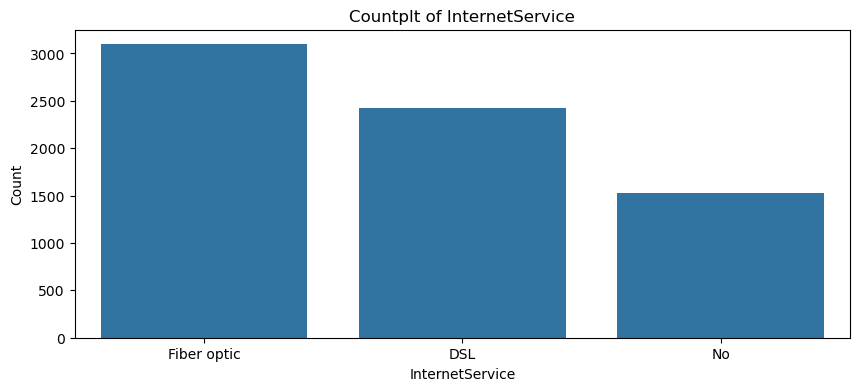

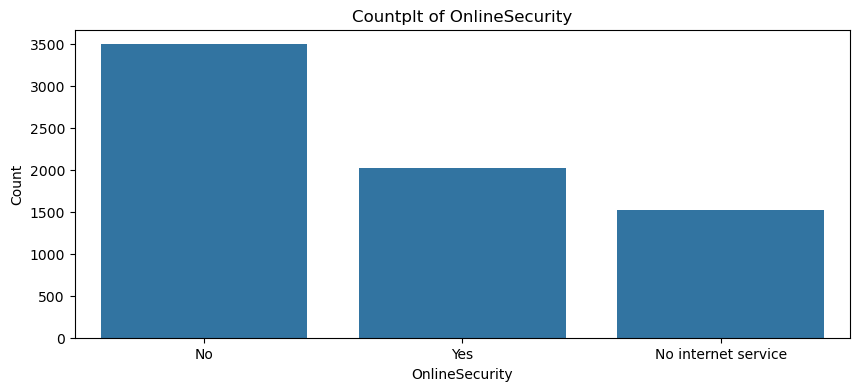

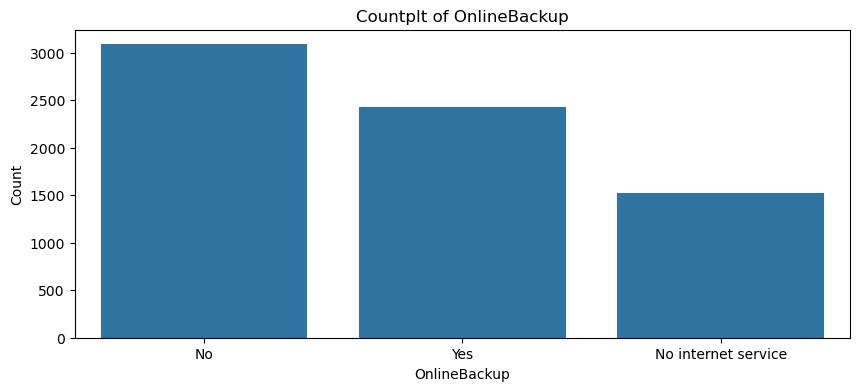

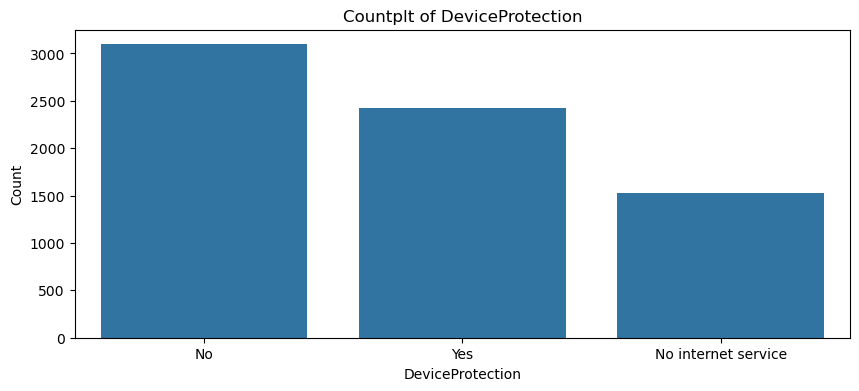

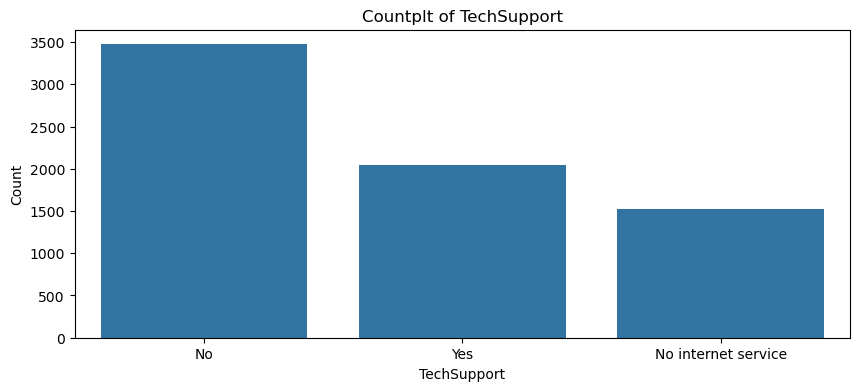

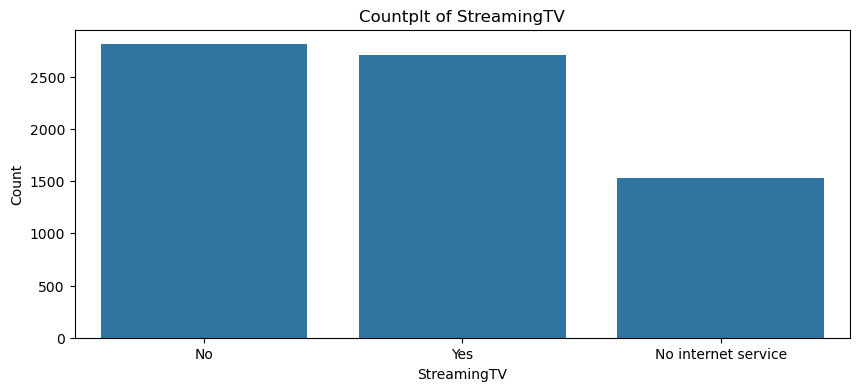

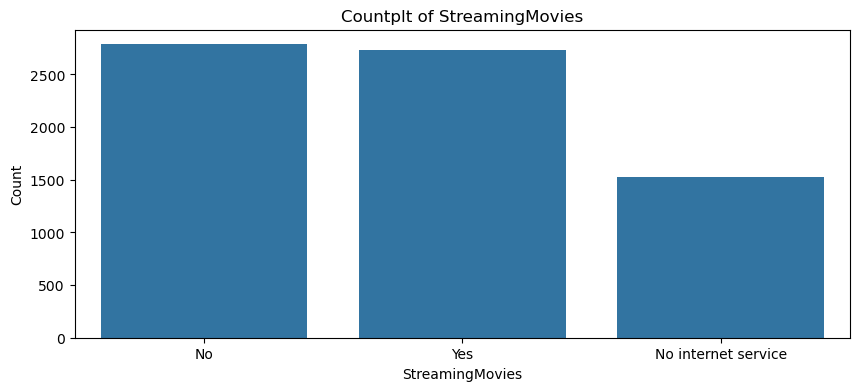

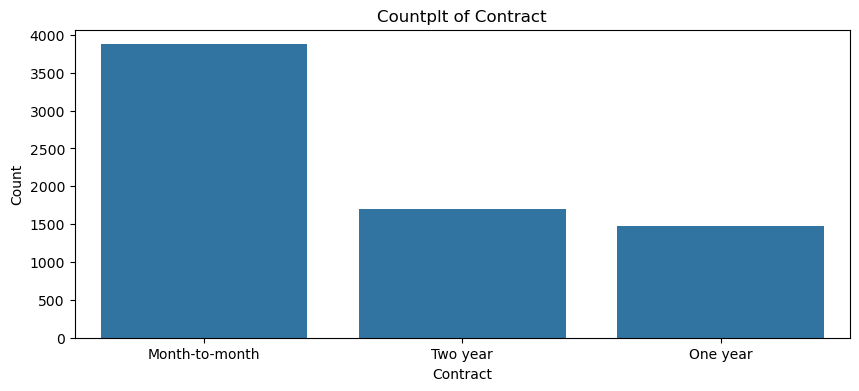

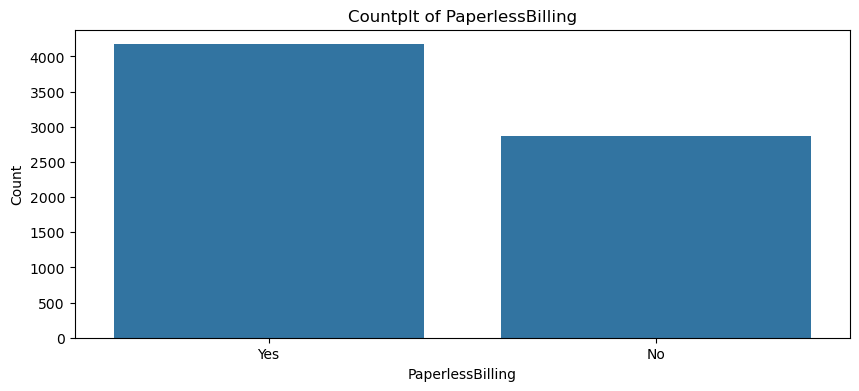

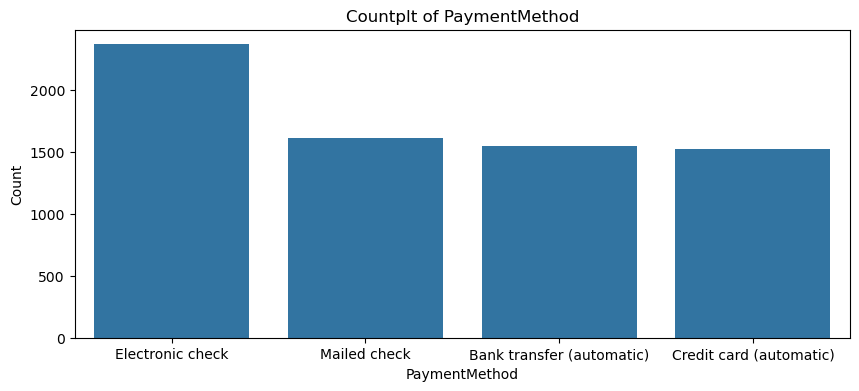

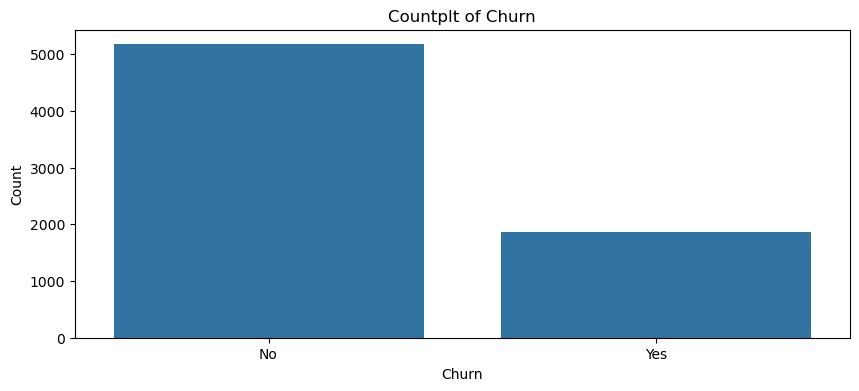

In [16]:
for col in categorical_cols: 
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    plt.title(f"Countplt of {col}")
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()

plt.close("all")

- Gender may doesn't affect churn because of balanced customers
- Partner status also doesn't affect
- more customers don't have dependents means they are younger, more mobile, less loyal segments which would correlate with higher churn
- Phone service is basic utility doesn't affect churn
- Multiple line customers may be higher value customers
- Fibre customers value high speed internet, hence high risk of churn because of high cost and competition
- Online security may not drive churn because only available for internet services
- Online backup may not be strong differentiator, but online backup customers show higher retention due to dependency on additional services
- Device protection is less popular
- streaming TV and movies correlate with internet type(fibre) may contribute to high monthly charges and possible churn
- Contract type: month to month customers prone to churn and year long are less prone due to lock in period
- Paperless billing combined with electronic payments often correlateswith higher churn(less lock in)
- Electronic check users (often budget-sensitive customers) show higher churn
- Credit card and bank transfer represent more stable, committed customer segments.
- ~5000 customers did NOT churn
- 2000 customers churned
- Churn rate ≈ 28–30% (typical for Telco datasets)
- Indicates significant business loss, requiring targeted retention strategies.

## High level interpretation 
- The company serves a balanced demographic, so churn is behaviour-driven, not demographic-driven
- High reliance on month-to-month contracts, electronic check payments, and fibre service customers likely major churn drivers.
- Customers without additional services (security, backup, tech support, streaming) are less engaged and more likely to churn.
- Majority without dependents → younger population → higher switching behaviour.

## Business implication
- Targeted Retention for High-Risk Segments:

- Fibre customers

- Electronic check users

- Month-to-month customers

- Customers with minimal add-on services

- Upselling Opportunities:

- Offer bundles: security + backup + tech support

- Discounted multi-line plans

- Upgrade DSL users to fibre with long-term discounts

- Encourage Long-Term Contracts:

- Incentivize 1-year and 2-year plans → reduces churn significantly.

- Improve Customer Experience:

- Especially for fibre-optic users who might churn due to price or service issues.

- mapping churn with 0 and 1 for No and Yes respectively

In [17]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [18]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes = axes.ravel()


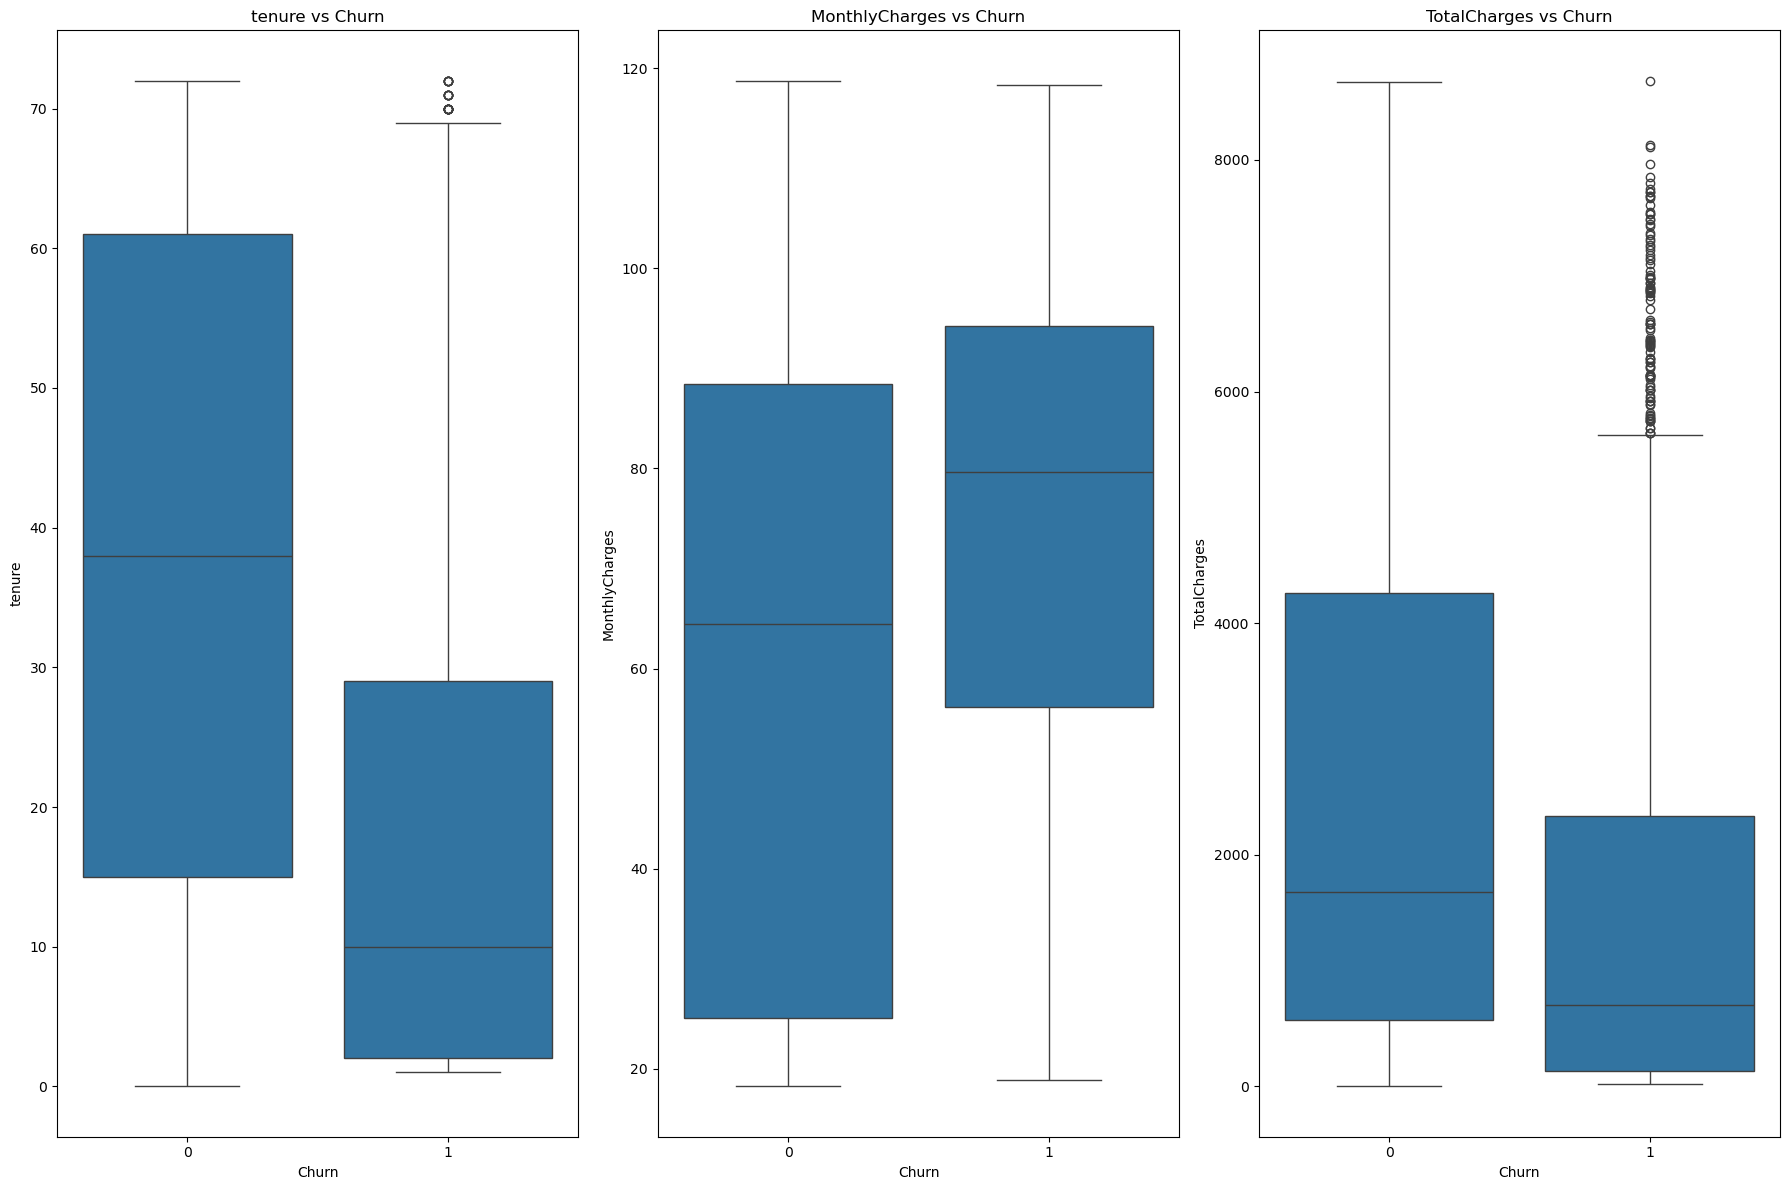

In [20]:
numeric_cols=['tenure','MonthlyCharges','TotalCharges']
for i,col in enumerate(numeric_cols): 
    sns.boxplot(data=df,x='Churn',y=col,ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


- Higher monthly charges churn customers

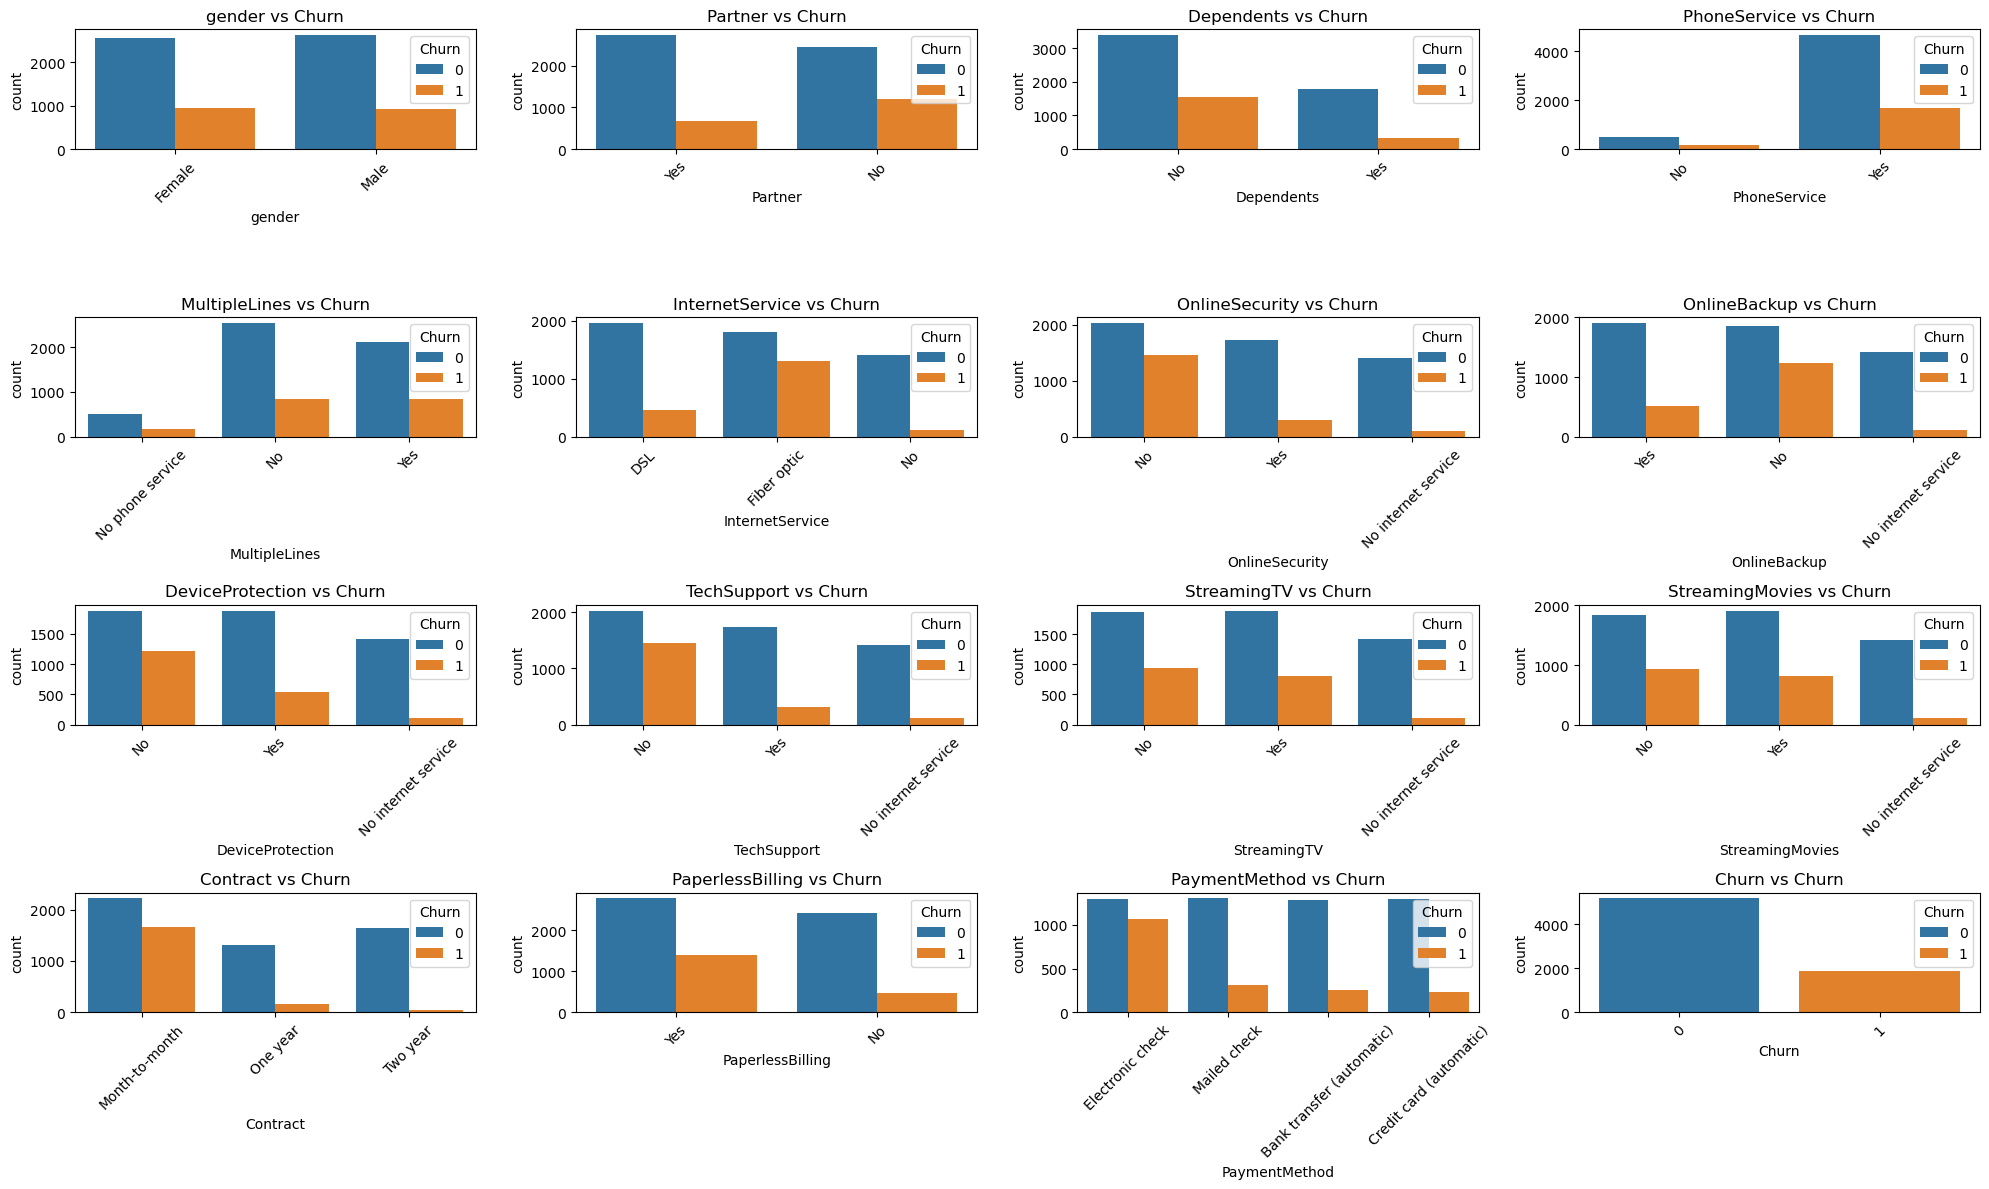

In [21]:
n_cats = len(categorical_cols)
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols[:]):  # Top 6 categorical
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- month to month contracts have highest churn

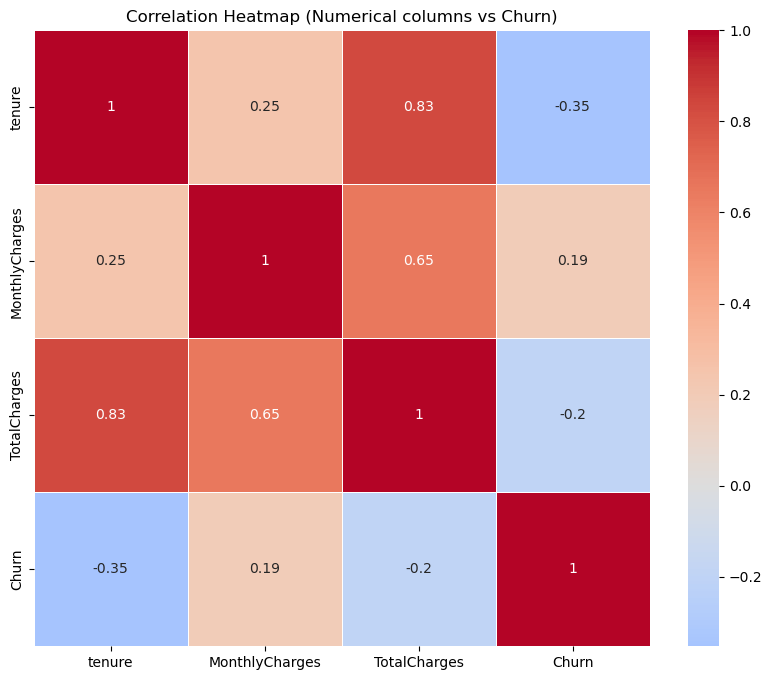

In [22]:
plt.figure(figsize=(10,8))
corr_matrix=df[numeric_cols + ["Churn"]].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0,square=True,linewidths=0.5)
plt.title("Correlation Heatmap (Numerical columns vs Churn)")
plt.show()

- Tenure and churn have negative correlation

In [23]:
print("=== TENURE vs CHURN ===")
monthly_churn=df.groupby("Churn")["MonthlyCharges"].agg(["mean","median","std","count"]).round(2)
print(monthly_churn)


=== TENURE vs CHURN ===
        mean  median    std  count
Churn                             
0      61.27   64.43  31.09   5174
1      74.44   79.65  24.67   1869


In [24]:
print("=== MONTHLY CHARGES vs CHURN ===")
tenure_churn=df.groupby("Churn")["tenure"].agg(["mean","median","std","count"]).round(2)
print(tenure_churn)


=== MONTHLY CHARGES vs CHURN ===
        mean  median    std  count
Churn                             
0      37.57    38.0  24.11   5174
1      17.98    10.0  19.53   1869


In [25]:
df['tenure_group'] = pd.cut(df['tenure'], bins=5, labels=['0-12', '13-24', '25-36', '37-48', '49+'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].mean().round(3) * 100
print("\n=== Churn Rate by Tenure Group (%) ===")
print(churn_by_tenure)


=== Churn Rate by Tenure Group (%) ===
tenure_group
0-12     46.4
13-24    26.2
25-36    21.7
37-48    15.0
49+       7.3
Name: Churn, dtype: float64


- Churners have lower tenure, higher monthly charges

In [26]:
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

## Pairplot: Shows correlations between numerical features and churn patterns

In [27]:
pariplot_cols=['tenure','MonthlyCharges','TotalCharges','Churn']

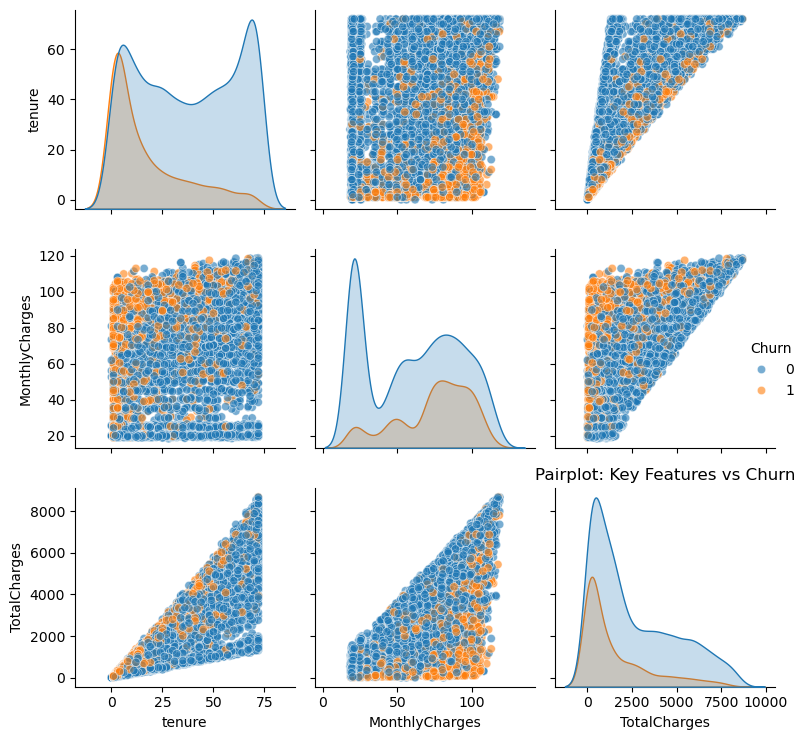

In [28]:
sns.pairplot(df[pariplot_cols],hue='Churn',diag_kind='kde',plot_kws={'alpha':0.6})
plt.title("Pairplot: Key Features vs Churn")
plt.tight_layout()
plt.show()

## Contract + Tenure + Churn: Month-to-month contracts have low tenure and high churn

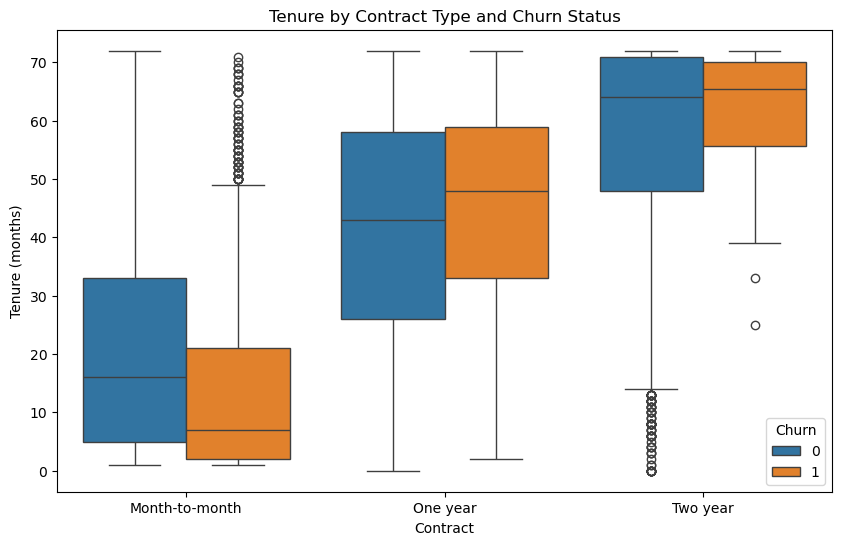

In [29]:
plt.figure(figsize=(10, 6))

# Box plot: Tenure by Contract Type and Churn
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn')
plt.title('Tenure by Contract Type and Churn Status')
plt.ylabel('Tenure (months)')
plt.show()
plt.close("all")

<Figure size 1000x600 with 0 Axes>

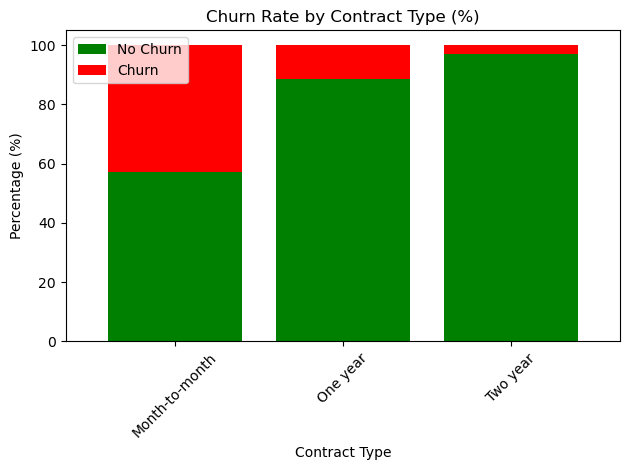

Churn rates by contract:
 Churn              0     1
Contract                  
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


In [30]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

plt.figure(figsize=(10, 6))
contract_churn.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.8)
plt.title('Churn Rate by Contract Type (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Contract Type')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Churn rates by contract:\n", contract_churn.round(1))

In [31]:
print("=== INTERACTION: Contract Type + Tenure + Churn ===")
interaction_summary = df.groupby(['Contract', 'Churn']).agg({
    'tenure': ['mean', 'median', 'count'],
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).round(2)
print(interaction_summary)

=== INTERACTION: Contract Type + Tenure + Churn ===
                     tenure              MonthlyCharges TotalCharges
                       mean median count           mean         mean
Contract       Churn                                                
Month-to-month 0      21.03   16.0  2220          61.46      1521.93
               1      14.02    7.0  1655          73.02      1164.46
One year       0      41.67   43.0  1307          62.51      2901.35
               1      44.96   48.0   166          85.05      4066.21
Two year       0      56.60   64.0  1647          60.01      3656.65
               1      61.27   65.5    48          86.78      5432.36


## Segmentation: Identifies customer personas (e.g., high-spend, long-tenure vs. low-spend, new customers)

In [32]:
segmentation_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_seg = df[segmentation_features].copy()

In [33]:
X_seg['TotalCharges'] = pd.to_numeric(X_seg['TotalCharges'], errors='coerce')
X_seg = X_seg.dropna()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)

In [35]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

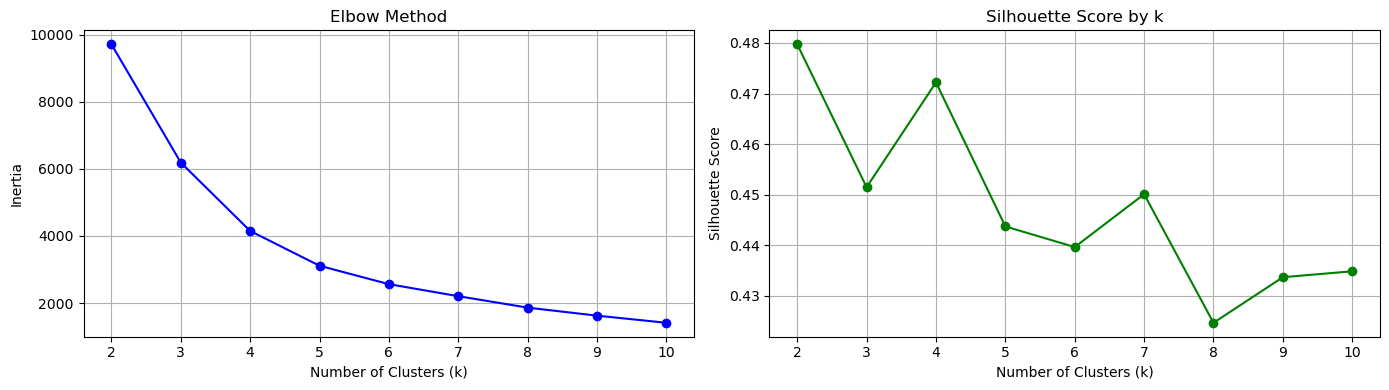

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'go-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [39]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_seg = X_seg.copy()
df_seg['Cluster'] = kmeans.fit_predict(X_scaled)

## Churn by Segment: Targets intervention strategies for high-risk segments

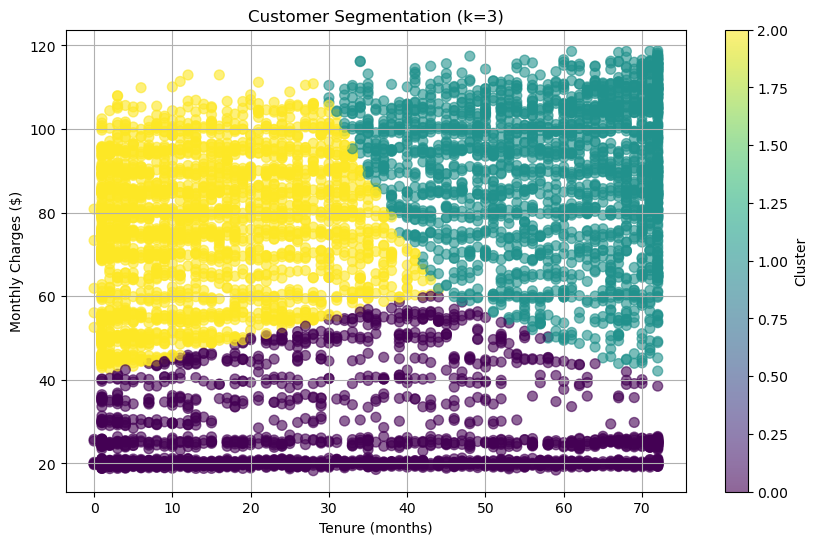

In [40]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_seg['tenure'], df_seg['MonthlyCharges'], 
                     c=df_seg['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title(f'Customer Segmentation (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [41]:
print("\n=== CUSTOMER SEGMENTS ===")
segment_summary = df_seg.groupby('Cluster').agg({
    'tenure': ['mean', 'median'],
    'MonthlyCharges': ['mean', 'median'],
    'TotalCharges': ['mean', 'median']
}).round(2)
print(segment_summary)


=== CUSTOMER SEGMENTS ===
        tenure        MonthlyCharges        TotalCharges         
          mean median           mean median         mean   median
Cluster                                                          
0        29.50   25.5          26.57  20.65       809.42   641.30
1        58.56   61.0          89.70  92.43      5246.13  5067.75
2        13.25   10.0          74.95  75.40      1030.57   780.50


In [42]:
df_seg['Churn'] = df.loc[df_seg.index, 'Churn']
print("\n=== CHURN RATE BY SEGMENT ===")
churn_by_segment = df_seg.groupby('Cluster')['Churn'].mean() * 100
print(churn_by_segment.round(2))


=== CHURN RATE BY SEGMENT ===
Cluster
0    12.30
1    15.36
2    47.08
Name: Churn, dtype: float64


## Handle Missing Values

In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [44]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [45]:
df['TotalCharges'].isnull().sum()

np.int64(0)

## Outlier Detection and Treatment

tenure: 0 outliers detected
MonthlyCharges: 0 outliers detected
TotalCharges: 0 outliers detected


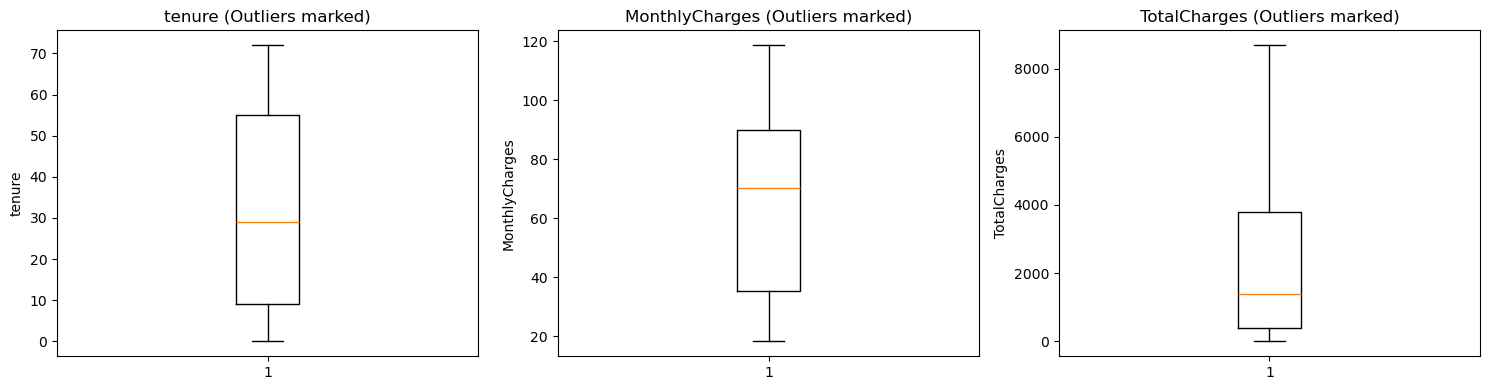

In [46]:
def get_outlier(data,column): 
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-IQR*Q3
    upper_fence=Q1+IQR*Q3
    return (data[column]<lower_fence) | (data[column]>upper_fence)

outlier_summary={}
for col in numeric_cols: 
    outliers=get_outlier(df,col) 
    outlier_summary[col]=outliers.sum()
    print(f"{col}: {outliers.sum()} outliers detected")

fig,axes=plt.subplots(1,3,figsize=(15,4))
for i,col in enumerate(numeric_cols): 
    axes[i].boxplot(df[col].dropna()) 
    axes[i].set_title(f"{col} (Outliers marked)")
    axes[i].set_ylabel(col)  
plt.tight_layout()
plt.show()

In [47]:
# clean_data = data[~((data[column] < lower_bound) | (data[column] > upper_bound))]
# ~ it keeps only non outliers

## Mapping Yes,No to 1,0

In [48]:
df1=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [49]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors="coerce")

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df1['gender']=df1['gender'].map({"Male":0,"Female":1})

In [53]:
df1['SeniorCitizen'].unique()

array([0, 1])

In [54]:
binary_cols=[
    col for col in df1.columns
    if df1[col].dropna().nunique()==2
]

In [55]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [56]:
df1['Churn']=df1['Churn'].map({"Yes":1,"No":0})

In [57]:
binarycols1=['Partner','Dependents','PhoneService','PaperlessBilling']

In [58]:
for col in binarycols1:
    if col in df1.columns:
        df1[col] = df1[col].map({'Yes': 1, 'No': 0})
        print(f"{col}: {df1[col].unique()}")

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
PaperlessBilling: [1 0]


In [59]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [60]:
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')  

print(f"Categorical columns to encode: {categorical_cols}")

Categorical columns to encode: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [61]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [62]:
df1.drop(columns=['customerID'],axis=1,inplace=True)

In [63]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [64]:
X=df1.drop("Churn",axis=1)
y=df1["Churn"]

In [65]:
numerical_cols=X.select_dtypes(include=["int64","float64"]).columns.to_list()
categoric_cols=X.select_dtypes(include="object").columns.to_list()

In [66]:
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


In [67]:
print(f"Categorical Columns: {categoric_cols}")

Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


## Applying ColumnTransformer which applies Transformations to both numeric and categoric columns

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

- StandardScaler applied to  numeric data to standardize data
- OneHotEncoder applied to Categorical column 

In [69]:
numerical_transformer=StandardScaler()
categoric_transformer=OneHotEncoder(drop='first',sparse_output=False)

In [70]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_cols), 
        ('cat', categoric_transformer,categoric_cols)
    ], 
    remainder="passthrough"
)

In [71]:
X_transformed=preprocessor.fit_transform(X)

In [72]:
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_transformed.shape}")

Original shape: (7043, 19)
Transformed shape: (7043, 30)


In [73]:
feature_names=preprocessor.get_feature_names_out()
print(f" Feature names after Transformation: {feature_names}")

 Feature names after Transformation: ['num__gender' 'num__SeniorCitizen' 'num__Partner' 'num__Dependents'
 'num__tenure' 'num__PhoneService' 'num__PaperlessBilling'
 'num__MonthlyCharges' 'num__TotalCharges'
 'cat__MultipleLines_No phone service' 'cat__MultipleLines_Yes'
 'cat__InternetService_Fiber optic' 'cat__InternetService_No'
 'cat__OnlineSecurity_No internet service' 'cat__OnlineSecurity_Yes'
 'cat__OnlineBackup_No internet service' 'cat__OnlineBackup_Yes'
 'cat__DeviceProtection_No internet service' 'cat__DeviceProtection_Yes'
 'cat__TechSupport_No internet service' 'cat__TechSupport_Yes'
 'cat__StreamingTV_No internet service' 'cat__StreamingTV_Yes'
 'cat__StreamingMovies_No internet service' 'cat__StreamingMovies_Yes'
 'cat__Contract_One year' 'cat__Contract_Two year'
 'cat__PaymentMethod_Credit card (automatic)'
 'cat__PaymentMethod_Electronic check' 'cat__PaymentMethod_Mailed check']


In [74]:
X_df=pd.DataFrame(X_transformed,columns=feature_names)
print(f"Transformed data:\n{X_df.head()}")

Transformed data:
   num__gender  num__SeniorCitizen  num__Partner  num__Dependents  \
0     1.009559           -0.439916      1.034530        -0.654012   
1    -0.990532           -0.439916     -0.966622        -0.654012   
2    -0.990532           -0.439916     -0.966622        -0.654012   
3    -0.990532           -0.439916     -0.966622        -0.654012   
4     1.009559           -0.439916     -0.966622        -0.654012   

   num__tenure  num__PhoneService  num__PaperlessBilling  num__MonthlyCharges  \
0    -1.277445          -3.054010               0.829798            -1.160323   
1     0.066327           0.327438              -1.205113            -0.259629   
2    -1.236724           0.327438               0.829798            -0.362660   
3     0.514251          -3.054010              -1.205113            -0.746535   
4    -1.236724           0.327438               0.829798             0.197365   

   num__TotalCharges  cat__MultipleLines_No phone service  ...  \
0          -0.

## Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

- fit_transform for X_train and transform for X_test to prevent data leakage

In [77]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

In [78]:
print(f"Train Transformed Shape: {X_train_transformed.shape}")
print(f"Test Transformed Shape: {X_test_transformed.shape}")

Train Transformed Shape: (5634, 30)
Test Transformed Shape: (1409, 30)


## RandomForestClassifier applied to get important features from dataset

In [79]:
from sklearn.ensemble import RandomForestClassifier

- Combines preprocessing + model into one unit, preventing data leakage

In [80]:
pipeline=Pipeline(
    [("preprocessor",preprocessor), 
    ("classifier",RandomForestClassifier(random_state=42,n_estimators=100))]
)

In [81]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [82]:
y_pred=pipeline.predict(X_test)

In [83]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [84]:
y_pred_probability=pipeline.predict_proba(X_test)

In [85]:
y_pred_probability

array([[0.24, 0.76],
       [0.91, 0.09],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.53, 0.47]])

## Model Evaluation

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [87]:
print("====Model Performance====")
print(f"ROC-AUC curve: {roc_auc_score(y_test,y_pred_probability[:,1]):.4f}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confustion Matrix: {confusion_matrix(y_test,y_pred)}")

====Model Performance====
ROC-AUC curve: 0.8377
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confustion Matrix: [[955  81]
 [202 171]]


In [88]:
feature_names_array=preprocessor.get_feature_names_out()

In [89]:
feature_importance=pd.Series(
    pipeline.named_steps['classifier'].feature_importances_,
    index=feature_names_array
).sort_values(ascending=False)

## Top 15 most important features which are key churn drivers

In [90]:
print(f"Top 15 IMPORTANT FEATURES : \n{feature_importance.head(15)}")

Top 15 IMPORTANT FEATURES : 
num__TotalCharges                      0.197594
num__tenure                            0.167568
num__MonthlyCharges                    0.167305
cat__InternetService_Fiber optic       0.039654
cat__PaymentMethod_Electronic check    0.036495
cat__Contract_Two year                 0.030564
num__gender                            0.027712
num__PaperlessBilling                  0.026965
cat__OnlineSecurity_Yes                0.026526
num__Partner                           0.024710
cat__Contract_One year                 0.022684
cat__TechSupport_Yes                   0.022637
cat__OnlineBackup_Yes                  0.022438
num__Dependents                        0.021021
num__SeniorCitizen                     0.019847
dtype: float64


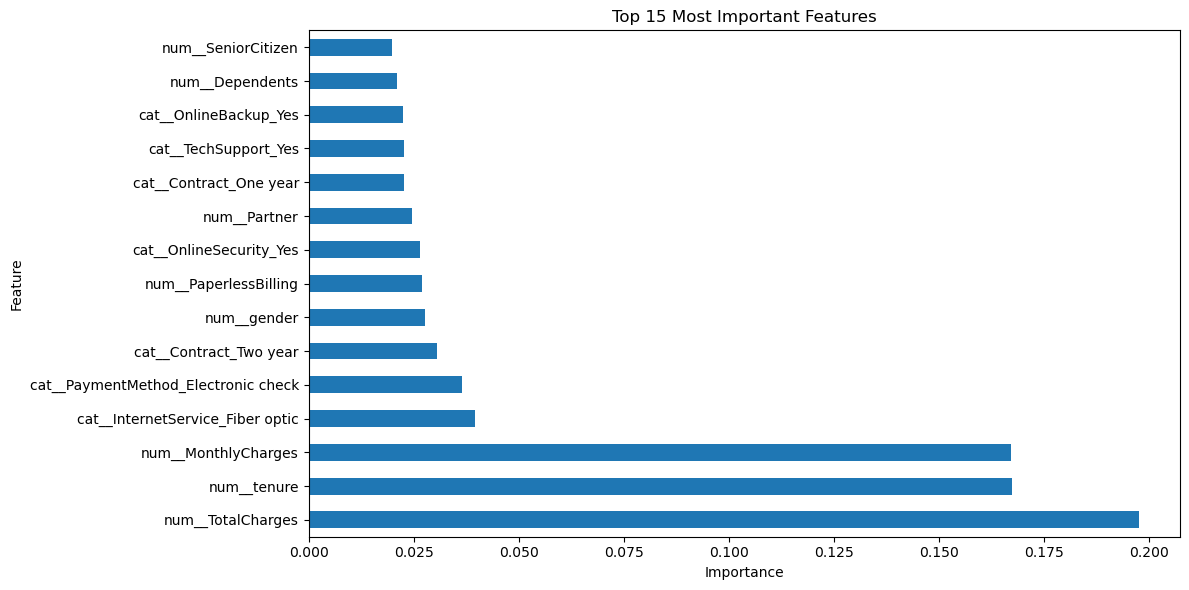

In [91]:
plt.figure(figsize=(12, 6))
feature_importance.head(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [92]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [93]:
binarycols1

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [94]:
binarycols2=['gender','SeniorCitizen','Churn']

In [95]:
binary_cols_final=binarycols1+binarycols2

In [96]:
X_transformed.shape

(7043, 30)

In [97]:
print("Features: \n ",X_df.columns.to_list()[:10])

Features: 
  ['num__gender', 'num__SeniorCitizen', 'num__Partner', 'num__Dependents', 'num__tenure', 'num__PhoneService', 'num__PaperlessBilling', 'num__MonthlyCharges', 'num__TotalCharges', 'cat__MultipleLines_No phone service']


# Feature Selection

### 1. Variance Thresholding

- Features with low variance carry less information
- removes constant or near constant features
- removes features with variance<threshold

In [98]:
from sklearn.feature_selection import VarianceThreshold,chi2,mutual_info_classif

In [99]:
selected_var=VarianceThreshold(threshold=0.01)
X_var_filtered=selected_var.fit_transform(X_df)

In [100]:
selected_features_var=X_df.columns[selected_var.get_support()].to_list()

In [101]:
removed_features_var=X_df.columns[~selected_var.get_support()].to_list()

In [102]:
print("Variances of each feature:")
variances=X_df.var()
print(variances.sort_values(ascending=False).head(10))

Variances of each feature:
num__TotalCharges                   1.000142
num__gender                         1.000142
num__PaperlessBilling               1.000142
num__Dependents                     1.000142
num__Partner                        1.000142
num__tenure                         1.000142
num__MonthlyCharges                 1.000142
num__PhoneService                   1.000142
num__SeniorCitizen                  1.000142
cat__InternetService_Fiber optic    0.246385
dtype: float64


In [103]:
print(f"Features Removed(low variance): {removed_features_var}")
print(f"Features Retained: {len(selected_features_var)} out of {X_df.shape[1]}")
print(f"New shape after variance filtering: {X_var_filtered.shape}")

Features Removed(low variance): []
Features Retained: 30 out of 30
New shape after variance filtering: (7043, 30)


### 2. Mutual Information

- Measures dependency between feature and target
- works with both categoric and numeric features
- Higher MI=Stronger dependency on target
- Identifies which feature has stronger relationship with churn 

In [104]:
X_df['num__TotalCharges']=X_df['num__TotalCharges'].fillna(0)

In [105]:
mi_scores=mutual_info_classif(X_df,y,random_state=42)
mi_df=pd.DataFrame({
    "Feature":X_df.columns,
    "MI_score":mi_scores
}).sort_values('MI_score',ascending=False)

In [106]:
print("Top 15 features by Mutual Information: ")
print(mi_df.head(15))

Top 15 features by Mutual Information: 
                                      Feature  MI_score
4                                 num__tenure  0.076320
26                     cat__Contract_Two year  0.057954
11           cat__InternetService_Fiber optic  0.054066
7                         num__MonthlyCharges  0.051238
12                    cat__InternetService_No  0.044575
8                           num__TotalCharges  0.043454
28        cat__PaymentMethod_Electronic check  0.043210
13    cat__OnlineSecurity_No internet service  0.040600
15      cat__OnlineBackup_No internet service  0.040024
17  cat__DeviceProtection_No internet service  0.034920
23   cat__StreamingMovies_No internet service  0.031759
19       cat__TechSupport_No internet service  0.027452
21       cat__StreamingTV_No internet service  0.026352
1                          num__SeniorCitizen  0.025085
25                     cat__Contract_One year  0.024191


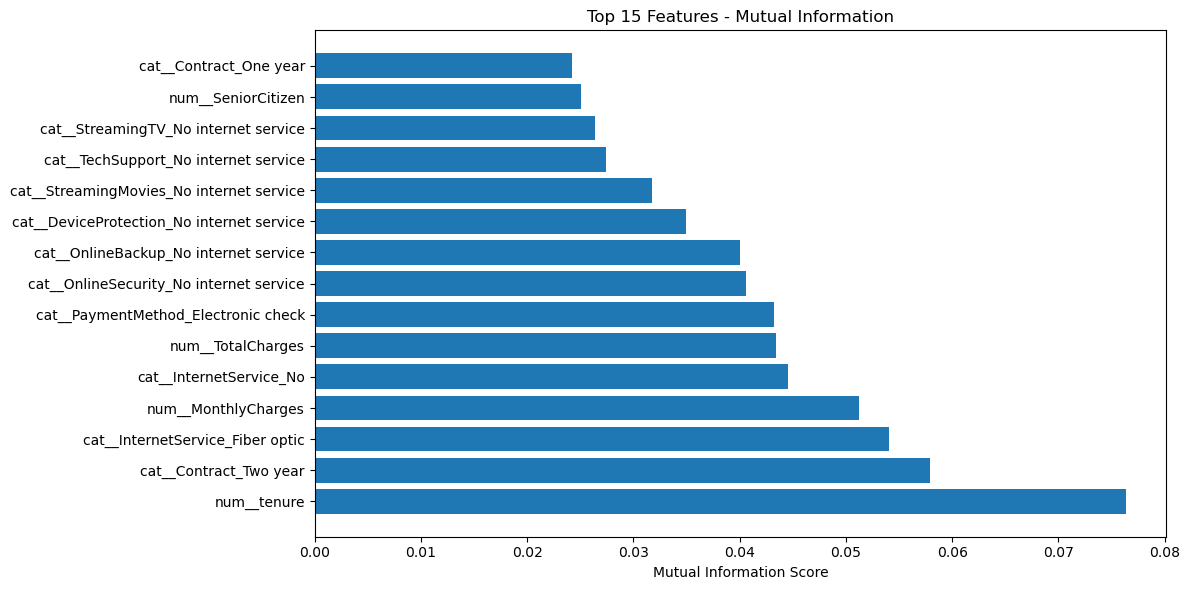

In [107]:
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'][:15], mi_df['MI_score'][:15])
plt.xlabel('Mutual Information Score')
plt.title('Top 15 Features - Mutual Information')
plt.tight_layout()
plt.show()

In [108]:
top_k_mi = mi_df['Feature'].head(10).tolist()
print(f"\nTop 10 features selected by MI: {top_k_mi}\n")


Top 10 features selected by MI: ['num__tenure', 'cat__Contract_Two year', 'cat__InternetService_Fiber optic', 'num__MonthlyCharges', 'cat__InternetService_No', 'num__TotalCharges', 'cat__PaymentMethod_Electronic check', 'cat__OnlineSecurity_No internet service', 'cat__OnlineBackup_No internet service', 'cat__DeviceProtection_No internet service']



### 3. CHI-SQUARE

- Measures independence between categorical features and target
- Only for categorical/non-negative features (0 to infinity scale)
- Higher chi-square = stronger assosciation with target
- Tests relationship between categories and churn

In [109]:
X_nonneg=X_df.copy()
X_nonneg=X_nonneg.clip(lower=0)

In [110]:
chi2_scores,chi2_pvalues=chi2(X_nonneg,y)
chi2_df=pd.DataFrame({
    "Feature":X_df.columns,
    "Chi2_Score":chi2_scores, 
    "P_values":chi2_pvalues
}).sort_values("Chi2_Score",ascending=False)

In [111]:
print("Top 15 Features by Chi-Squares:")
print(chi2_df.head(15))

Top 15 Features by Chi-Squares:
                                      Feature  Chi2_Score       P_values
26                     cat__Contract_Two year  488.578090  2.905390e-108
4                                 num__tenure  467.658249  1.035985e-103
28        cat__PaymentMethod_Electronic check  426.422767   9.760677e-95
11           cat__InternetService_Fiber optic  374.476216   1.984260e-83
1                          num__SeniorCitizen  305.402382   2.191839e-68
12                    cat__InternetService_No  286.520193   2.849642e-64
17  cat__DeviceProtection_No internet service  286.520193   2.849642e-64
19       cat__TechSupport_No internet service  286.520193   2.849642e-64
23   cat__StreamingMovies_No internet service  286.520193   2.849642e-64
21       cat__StreamingTV_No internet service  286.520193   2.849642e-64
13    cat__OnlineSecurity_No internet service  286.520193   2.849642e-64
15      cat__OnlineBackup_No internet service  286.520193   2.849642e-64
8                  

In [112]:
significant_features_chi2 = chi2_df[chi2_df['P_values'] < 0.05]['Feature'].tolist()
print(f"\nStatistically significant features (p < 0.05): {len(significant_features_chi2)} features")
print(significant_features_chi2[:10])


Statistically significant features (p < 0.05): 27 features
['cat__Contract_Two year', 'num__tenure', 'cat__PaymentMethod_Electronic check', 'cat__InternetService_Fiber optic', 'num__SeniorCitizen', 'cat__InternetService_No', 'cat__DeviceProtection_No internet service', 'cat__TechSupport_No internet service', 'cat__StreamingMovies_No internet service', 'cat__StreamingTV_No internet service']


### 4. SHAP Feature Importance

- Works with any model, shows how features drive individual predictions
- |SHAP value| =average impact of feature on prediction magnitude
- Reveals not just importance but direction of impact

In [113]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_df, y)

RandomForestClassifier(random_state=42)

In [114]:
model_importance = pd.DataFrame({
    'Feature': X_df.columns,
    'Model_Importance': rf_model.feature_importances_
}).sort_values('Model_Importance', ascending=False)

In [115]:
print("Top 15 features by Random Forest importance:")
print(model_importance.head(15))

Top 15 features by Random Forest importance:
                                Feature  Model_Importance
8                     num__TotalCharges          0.201707
7                   num__MonthlyCharges          0.170808
4                           num__tenure          0.169007
28  cat__PaymentMethod_Electronic check          0.039410
11     cat__InternetService_Fiber optic          0.038636
26               cat__Contract_Two year          0.028330
0                           num__gender          0.027478
6                 num__PaperlessBilling          0.025520
14              cat__OnlineSecurity_Yes          0.024595
2                          num__Partner          0.023659
25               cat__Contract_One year          0.023064
20                 cat__TechSupport_Yes          0.022527
16                cat__OnlineBackup_Yes          0.020764
1                    num__SeniorCitizen          0.020443
3                       num__Dependents          0.019918


In [116]:
print("Hello")

Hello


In [117]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_df)

In [118]:
if isinstance(shap_values, list):
    shap_values_churn = shap_values[1]  # Class 1 (Churn)
else:
    shap_values_churn = shap_values

In [122]:
import numpy as np
import pandas as pd

# Keep original for diagnostics
orig_sv = shap_values_churn
sv = orig_sv

# If it's a SHAP Explanation object, preserve feature names if present, and use .values
shap_feature_names = None
if hasattr(sv, "values"):
    # Explanation object: it may have .feature_names or .data
    if hasattr(sv, "feature_names") and sv.feature_names is not None:
        shap_feature_names = list(sv.feature_names)
    sv = sv.values

# convert to ndarray (handles list-of-arrays returned by some explainers)
sv = np.array(sv)

# compute per-feature mean absolute SHAP depending on dimensions
if sv.ndim == 2:
    mean_abs = np.mean(np.abs(sv), axis=0)              # (n_features,)
elif sv.ndim == 3:
    mean_abs = np.mean(np.abs(sv), axis=(0, 1))        # (n_features,)
else:
    raise ValueError(f"Unexpected shap_values shape: {sv.shape}. "
                     "Expected 2D (n_samples,n_features) or 3D (n_classes,n_samples,n_features).")

n_shap_features = mean_abs.shape[0]
n_df_columns = X_df.shape[1]

print("DEBUG: shap values shape (after processing):", sv.shape)
print("DEBUG: computed mean_abs length (n_features from SHAP):", n_shap_features)
print("DEBUG: X_df.shape:", X_df.shape)

# Resolve feature name source / mismatch
if shap_feature_names is not None:
    # Use SHAP's feature names if their count matches
    if len(shap_feature_names) == n_shap_features:
        feature_names = shap_feature_names
        print("INFO: Using feature names from SHAP Explanation.object")
    else:
        print("WARN: SHAP Explanation.feature_names exists but length does not match shap feature count.")
        shap_feature_names = None  # ignore it below

if shap_feature_names is None:
    # prefer X_df columns if lengths match
    if n_df_columns == n_shap_features:
        feature_names = list(X_df.columns)
        print("INFO: Using X_df.columns (length matches SHAP).")
    elif n_df_columns > n_shap_features:
        # SHAP has fewer features than X_df — maybe SHAP was given a subset/encoded version
        # Choose first n_shap_features columns (safe default) but warn strongly.
        feature_names = list(X_df.columns[:n_shap_features])
        print("WARN: X_df has more columns than SHAP features. Using the first",
              n_shap_features, "columns from X_df to align.")
    else:
        # SHAP has more features than X_df — probably one-hot expanded features or different input
        # Create placeholder names (f_0, f_1, ...) or, if you want, try to supply proper names.
        feature_names = [f"shap_f_{i}" for i in range(n_shap_features)]
        print("WARN: SHAP reports more features than X_df columns. Creating placeholder feature names.")

# Final DataFrame
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'SHAP_Importance': mean_abs
}).sort_values('SHAP_Importance', ascending=False).reset_index(drop=True)

print("\nSUMMARY:")
print(" - final number of features in shap_importance:", shap_importance.shape[0])
print(" - top features:\n", shap_importance.head(10))

shap_importance


DEBUG: shap values shape (after processing): (7043, 30, 2)
DEBUG: computed mean_abs length (n_features from SHAP): 2
DEBUG: X_df.shape: (7043, 30)
WARN: X_df has more columns than SHAP features. Using the first 2 columns from X_df to align.

SUMMARY:
 - final number of features in shap_importance: 2
 - top features:
               Feature  SHAP_Importance
0  num__SeniorCitizen         0.016206
1         num__gender         0.016206


,Feature,SHAP_Importance
0,num__SeniorCitizen,0.016206
1,num__gender,0.016206


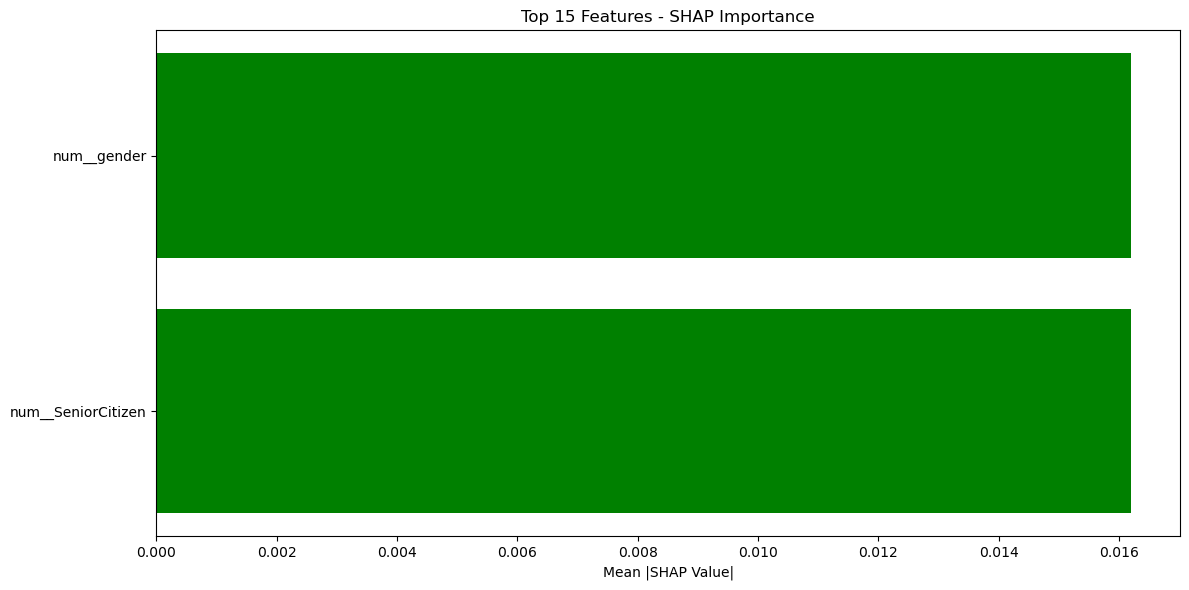

In [124]:
plt.figure(figsize=(12, 6))
plt.barh(shap_importance['Feature'][:15], shap_importance['SHAP_Importance'][:15], color='green')
plt.xlabel('Mean |SHAP Value|')
plt.title('Top 15 Features - SHAP Importance')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

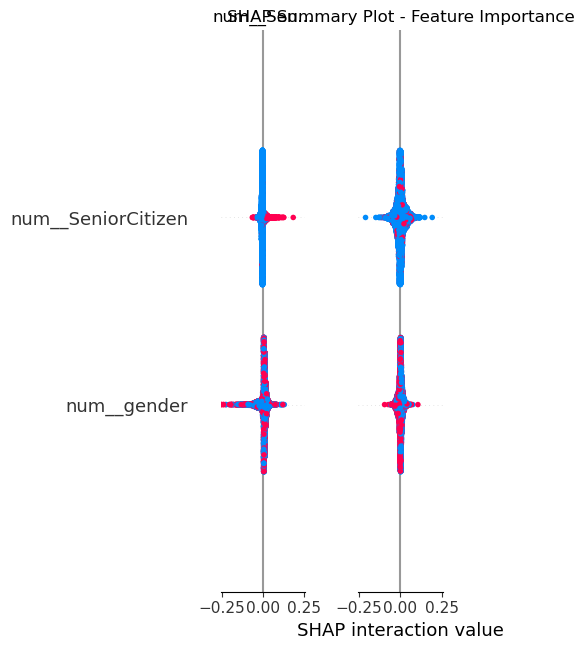

In [126]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_churn, X_df, plot_type='bar', show=False)
plt.title('SHAP Summary Plot - Feature Importance')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

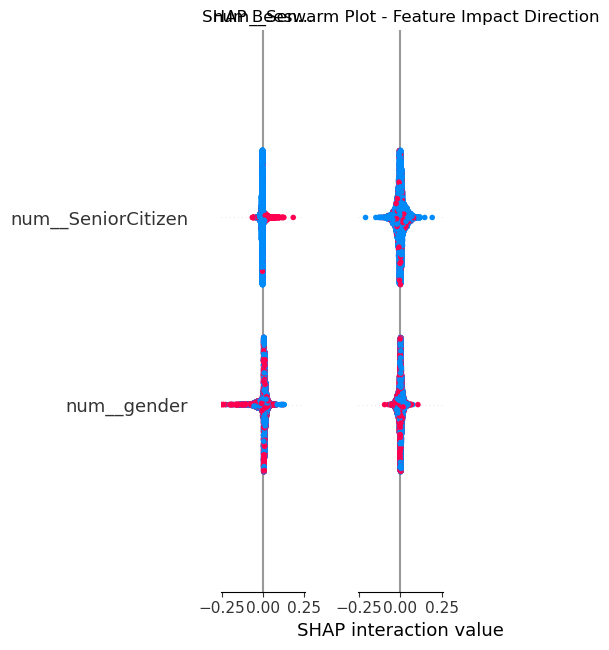

In [128]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_churn, X_df, show=False)
plt.title('SHAP Beeswarm Plot - Feature Impact Direction')
plt.tight_layout()
plt.show()

In [134]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = list(X_df.columns)

def debug_missing(source_df, source_name, feature_col_name):
    # source_df expected to have columns ['Feature', feature_col_name]
    missing = set(features) - set(source_df['Feature'])
    if missing:
        print(f"WARN: {len(missing)} features from X_df missing in {source_name}. Example missing (up to 10):")
        print(list(missing)[:10])
    else:
        print(f"OK: All X_df features present in {source_name}.")

# Run diagnostics
debug_missing(mi_df, "mi_df", "MI_score")
debug_missing(chi2_df, "chi2_df", "Chi2_Score")
debug_missing(model_importance, "model_importance", "Model_Importance")
debug_missing(shap_importance, "shap_importance", "SHAP_Importance")

# Helper to get a scaled numpy 1D array aligned to features
def get_scaled_aligned(source_df, value_col, fill_value=0.0):
    # Build a Series indexed by Feature then reindex to features list
    s = source_df.set_index('Feature')[value_col].reindex(features)
    # Fill missing values (change policy here if you'd rather keep NaN)
    s = s.fillna(fill_value)
    # Scale (MinMaxScaler expects 2D input)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(s.values.reshape(-1, 1)).flatten()
    return scaled

# Create comparison DataFrame using reindex/fill/scale
comparison_df = pd.DataFrame({
    'Feature': features,
    'Mutual_Info': get_scaled_aligned(mi_df, 'MI_score', fill_value=0.0),
    'Chi_Square': get_scaled_aligned(chi2_df, 'Chi2_Score', fill_value=0.0),
    'Model_Importance': get_scaled_aligned(model_importance, 'Model_Importance', fill_value=0.0),
    'SHAP_Importance': get_scaled_aligned(shap_importance, 'SHAP_Importance', fill_value=0.0),
})

# Calculate average score across all methods
comparison_df['Average_Score'] = comparison_df[['Mutual_Info', 'Chi_Square', 'Model_Importance', 'SHAP_Importance']].mean(axis=1)
comparison_df = comparison_df.sort_values('Average_Score', ascending=False).reset_index(drop=True)

print("\nTop 15 features across all methods (normalized 0-1):")
print(comparison_df.head(15).round(3))


OK: All X_df features present in mi_df.
OK: All X_df features present in chi2_df.
OK: All X_df features present in model_importance.
WARN: 28 features from X_df missing in shap_importance. Example missing (up to 10):
['cat__StreamingTV_No internet service', 'cat__PaymentMethod_Electronic check', 'num__PaperlessBilling', 'cat__OnlineSecurity_No internet service', 'cat__TechSupport_No internet service', 'cat__InternetService_Fiber optic', 'cat__OnlineSecurity_Yes', 'num__Dependents', 'cat__MultipleLines_No phone service', 'num__TotalCharges']

Top 15 features across all methods (normalized 0-1):
                                      Feature  Mutual_Info  Chi_Square  \
0                                 num__tenure        1.000       0.957   
1                          num__SeniorCitizen        0.329       0.625   
2                           num__TotalCharges        0.569       0.445   
3                      cat__Contract_Two year        0.759       1.000   
4                         num

<Figure size 1400x800 with 0 Axes>

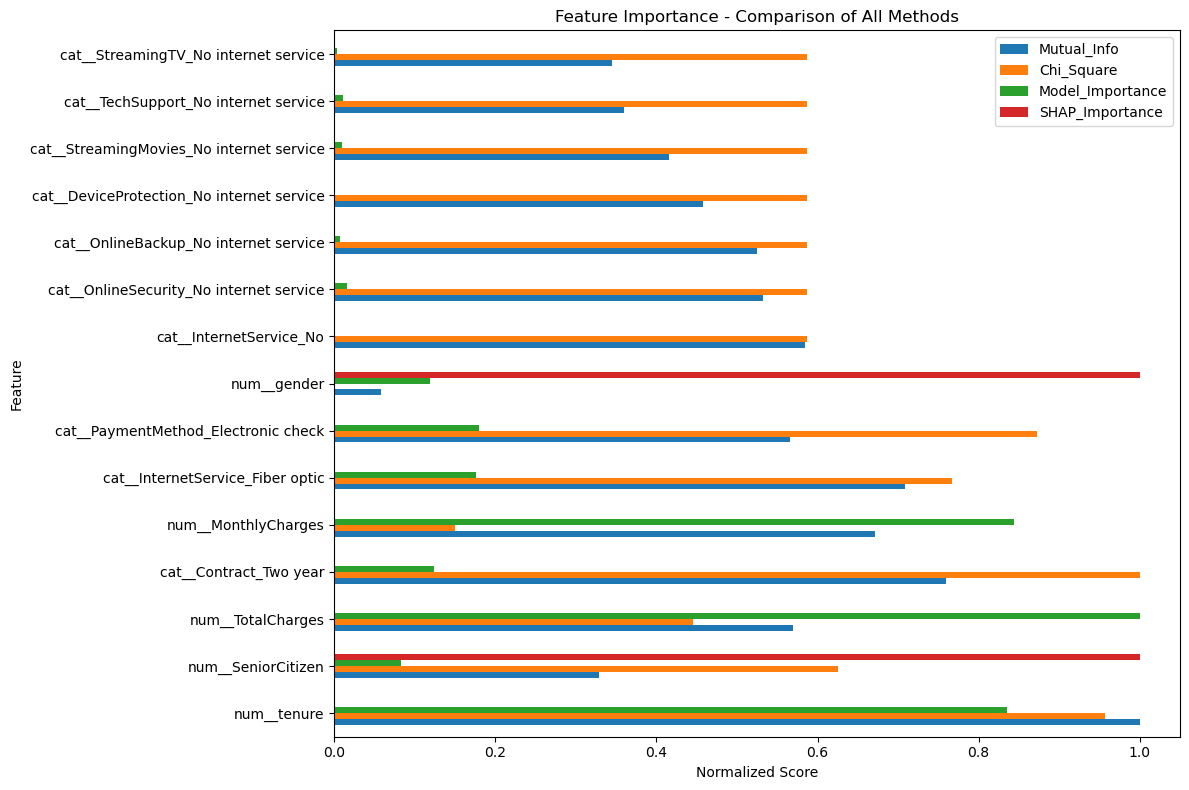

In [135]:
plt.figure(figsize=(14, 8))
comparison_top = comparison_df.head(15).set_index('Feature')
comparison_top[['Mutual_Info', 'Chi_Square', 'Model_Importance', 'SHAP_Importance']].plot(
    kind='barh', figsize=(12, 8)
)
plt.xlabel('Normalized Score')
plt.title('Feature Importance - Comparison of All Methods')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [136]:
print("\n" + "=" * 60)
print("FINAL RECOMMENDATION: Top Features for Model")
print("=" * 60)

# Select features that rank high in at least 2-3 methods
top_features_consensus = comparison_df[comparison_df['Average_Score'] > comparison_df['Average_Score'].quantile(0.75)]['Feature'].tolist()

print(f"\nTop {len(top_features_consensus)} features recommended for final model:")
for i, feat in enumerate(top_features_consensus, 1):
    print(f"{i}. {feat}")



FINAL RECOMMENDATION: Top Features for Model

Top 8 features recommended for final model:
1. num__tenure
2. num__SeniorCitizen
3. num__TotalCharges
4. cat__Contract_Two year
5. num__MonthlyCharges
6. cat__InternetService_Fiber optic
7. cat__PaymentMethod_Electronic check
8. num__gender


In [138]:
X_final = X_df[top_features_consensus]
print(f"\nFinal dataset shape: {X_final.shape} (reduced from {X_df.shape[1]})")

# Train model with selected features
rf_final = RandomForestClassifier(random_state=42, n_estimators=100)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_final, X_final, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC-AUC with selected features: {scores.mean():.4f} (+/- {scores.std():.4f})")


Final dataset shape: (7043, 8) (reduced from 30)

Cross-validation ROC-AUC with selected features: 0.7965 (+/- 0.0096)


In [139]:
# train test split of the X_final

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
df1['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [143]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_final,y,test_size=0.2,stratify=y,random_state=42)

### Class Imbalance Analysis

In [144]:
print("Class Distribution :",y_train_new.value_counts())

Class Distribution : Churn
0    4139
1    1495
Name: count, dtype: int64


In [145]:
print("Class Distribution in percentage: ",((y_train_new.value_counts()/len(y_train_new))*100).round(2))

Class Distribution in percentage:  Churn
0    73.46
1    26.54
Name: count, dtype: float64


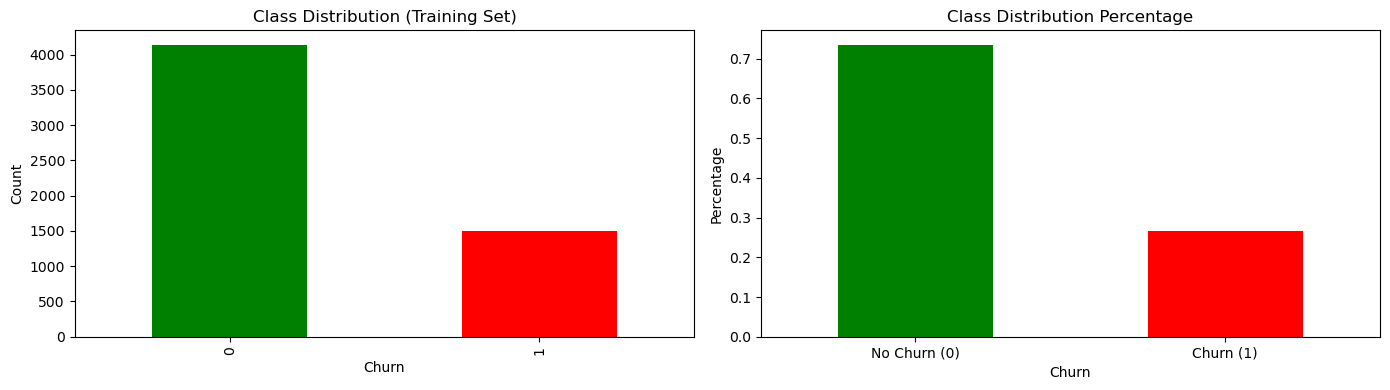

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

y_train_new.value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (Training Set)')
axes[0].set_ylabel('Count')

y_train_new.value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Class Distribution Percentage')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['No Churn (0)', 'Churn (1)'], rotation=0)

plt.tight_layout()
plt.show()

In [150]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

### SMOTE Analysis

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
smote=SMOTE(random_state=42)

In [155]:
X_train_new_smote,y_train_new_smote=smote.fit_resample(X_train_scaled_new,y_train_new)

In [156]:
print(f"Before SMOTE : {y_train_new.value_counts().to_dict()}")
print(f"After SMOTE : {y_train_new_smote.value_counts().to_dict()}")

Before SMOTE : {0: 4139, 1: 1495}
After SMOTE : {0: 4139, 1: 4139}


In [160]:
from sklearn.metrics import recall_score,roc_auc_score ,precision_score,f1_score,classification_report

In [161]:
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_smote.fit(X_train_new_smote, y_train_new_smote)

y_pred_smote = rf_smote.predict(X_test_scaled_new)
y_pred_proba_smote = rf_smote.predict_proba(X_test_scaled_new)[:, 1]

print("\nModel Performance with SMOTE:")
print(f"ROC-AUC: {roc_auc_score(y_test_new, y_pred_proba_smote):.4f}")
print(f"Recall (Important!): {recall_score(y_test_new, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_smote):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_smote):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test_new, y_pred_smote)}")


Model Performance with SMOTE:
ROC-AUC: 0.7834
Recall (Important!): 0.6096
Precision: 0.5101
F1-Score: 0.5554

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.51      0.61      0.56       374

    accuracy                           0.74      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.74      0.75      1409



In [163]:
print("\n" + "=" * 70)
print("TECHNIQUE 3: CLASS WEIGHTING")
print("=" * 70)

"""
Why Class Weighting:
- Penalizes misclassification of minority class during training
- No synthetic data generation, just adjusts loss function
- Computationally efficient
For Telco: Tells model: "False negatives (missing churners) are more expensive"
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, f1_score, recall_score, precision_score
)


# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train_new), class_weights))

print(f"\nCalculated class weights: {class_weight_dict}")
print(f"Interpretation: Minority class gets {class_weights[1]/class_weights[0]:.2f}x higher weight")

# Train model with class weighting
rf_weighted = RandomForestClassifier(
    random_state=42, 
    n_estimators=100, 
    class_weight=class_weight_dict
)
rf_weighted.fit(X_train_scaled_new, y_train_new)

y_pred_weighted = rf_weighted.predict(X_test_scaled_new)
y_pred_proba_weighted = rf_weighted.predict_proba(X_test_scaled_new)[:, 1]

print("\nModel Performance with Class Weighting:")
print(f"ROC-AUC: {roc_auc_score(y_test_new, y_pred_proba_weighted):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_weighted):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_weighted):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_weighted):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test_new, y_pred_weighted)}")


TECHNIQUE 3: CLASS WEIGHTING

Calculated class weights: {np.int64(0): np.float64(0.680763653939101), np.int64(1): np.float64(1.8830213903743316)}
Interpretation: Minority class gets 2.77x higher weight

Model Performance with Class Weighting:
ROC-AUC: 0.7915
Recall: 0.4679
Precision: 0.5952
F1-Score: 0.5240

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409




TECHNIQUE 4: THRESHOLD TUNING

Metrics at different thresholds:
   Threshold  Recall  Precision      F1  ROC_AUC
0       0.30  0.6578     0.5010  0.5688   0.7915
1       0.35  0.6310     0.5164  0.5680   0.7915
2       0.40  0.5775     0.5307  0.5531   0.7915
3       0.45  0.5241     0.5552  0.5392   0.7915
4       0.50  0.4733     0.5880  0.5244   0.7915
5       0.55  0.4171     0.6118  0.4960   0.7915
6       0.60  0.3824     0.6137  0.4712   0.7915
7       0.65  0.3209     0.6154  0.4218   0.7915
8       0.70  0.2701     0.6312  0.3783   0.7915
9       0.75  0.2273     0.6538  0.3373   0.7915


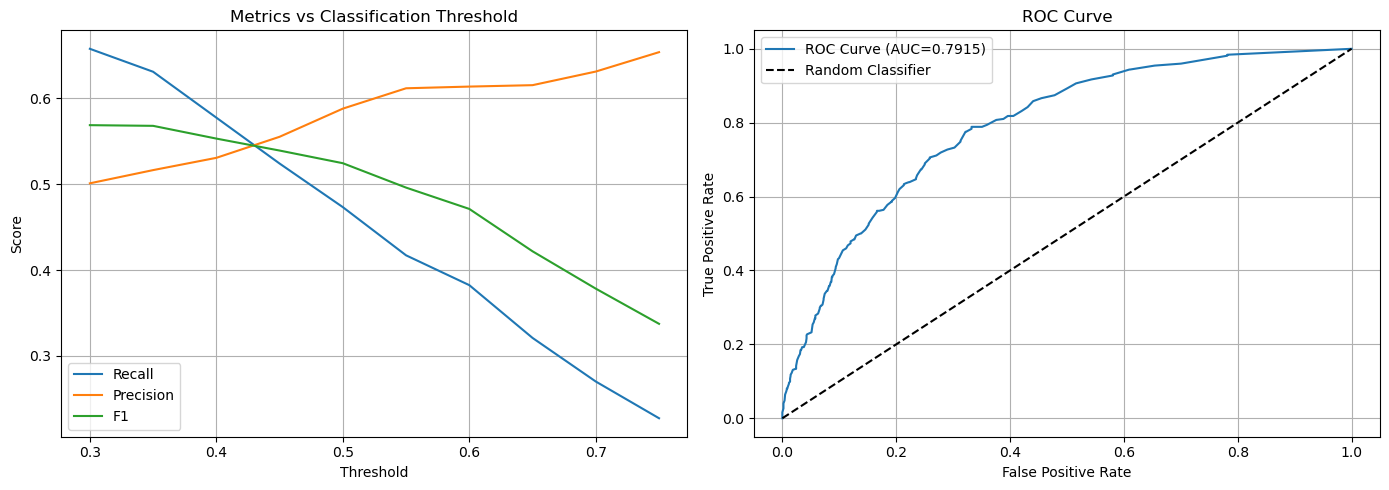

In [165]:
print("\n" + "=" * 70)
print("TECHNIQUE 4: THRESHOLD TUNING")
print("=" * 70)

"""
Why Threshold Tuning:
- Default threshold is 0.5, but optimal threshold depends on business cost
- For churn: False negatives (missed churners) are more expensive than false positives
- Lowering threshold increases recall but decreases precision
For Telco: If retention cost < churn loss, lower threshold to catch more churners
"""

# Use model with class weighting
y_pred_proba = y_pred_proba_weighted

# Try different thresholds
thresholds = np.arange(0.3, 0.8, 0.05)
metrics = []

for threshold in thresholds:
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    metrics.append({
        'Threshold': threshold,
        'Recall': recall_score(y_test_new, y_pred_custom),
        'Precision': precision_score(y_test_new, y_pred_custom),
        'F1': f1_score(y_test_new, y_pred_custom),
        'ROC_AUC': roc_auc_score(y_test_new, y_pred_proba)
    })

threshold_df = pd.DataFrame(metrics)
print("\nMetrics at different thresholds:")
print(threshold_df.round(4))

# Plot threshold tuning
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics vs Threshold
threshold_df.plot(x='Threshold', y=['Recall', 'Precision', 'F1'], ax=axes[0])
axes[0].set_title('Metrics vs Classification Threshold')
axes[0].set_ylabel('Score')
axes[0].legend(['Recall', 'Precision', 'F1'])
axes[0].grid(True)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_new, y_pred_proba)
axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc_score(y_test_new, y_pred_proba):.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [166]:
print("\n" + "=" * 70)
print("TECHNIQUE 2: ADASYN (Adaptive Synthetic Sampling)")
print("=" * 70)

"""
Why ADASYN:
- Adaptive version of SMOTE
- Creates more synthetic samples near harder-to-learn minority samples
- Better performance on harder classification regions
For Telco: Focuses on difficult churn cases that are near decision boundary
"""

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled_new, y_train_new)

print(f"\nBefore ADASYN: {y_train_new.value_counts().to_dict()}")
print(f"After ADASYN: {pd.Series(y_train_adasyn).value_counts().to_dict()}")

# Train model with ADASYN
rf_adasyn = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = rf_adasyn.predict(X_test_scaled_new)
y_pred_proba_adasyn = rf_adasyn.predict_proba(X_test_scaled_new)[:, 1]

print("\nModel Performance with ADASYN:")
print(f"ROC-AUC: {roc_auc_score(y_test_new, y_pred_proba_adasyn):.4f}")
print(f"Recall: {recall_score(y_test_new, y_pred_adasyn):.4f}")
print(f"Precision: {precision_score(y_test_new, y_pred_adasyn):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_adasyn):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test_new, y_pred_adasyn)}")


TECHNIQUE 2: ADASYN (Adaptive Synthetic Sampling)

Before ADASYN: {0: 4139, 1: 1495}
After ADASYN: {0: 4139, 1: 4045}

Model Performance with ADASYN:
ROC-AUC: 0.7755
Recall: 0.6230
Precision: 0.4864
F1-Score: 0.5463

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1035
           1       0.49      0.62      0.55       374

    accuracy                           0.73      1409
   macro avg       0.67      0.69      0.67      1409
weighted avg       0.75      0.73      0.73      1409



In [168]:
optimal_threshold = threshold_df.loc[threshold_df['Recall'].idxmax(), 'Threshold']
print(f"\nOptimal threshold (max recall): {optimal_threshold:.2f}")

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print(f"\nFinal Performance with Optimal Threshold ({optimal_threshold:.2f}):")
print(f"Recall: {recall_score(y_test, y_pred_optimal):.4f} (catch {recall_score(y_test_new, y_pred_optimal)*100:.1f}% of churners)")
print(f"Precision: {precision_score(y_test_new, y_pred_optimal):.4f}")
print(f"F1-Score: {f1_score(y_test_new, y_pred_optimal):.4f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test_new, y_pred_optimal)}")

# ===== COMPARISON OF ALL TECHNIQUES =====
print("\n" + "=" * 70)
print("COMPARISON: All Imbalance Handling Techniques")
print("=" * 70)

comparison_results = pd.DataFrame({
    'Technique': ['Baseline (No Handling)', 'SMOTE', 'ADASYN', 'Class Weighting', 'Threshold Tuning'],
    'ROC_AUC': [
        roc_auc_score(y_test_new, rf_smote.predict_proba(X_test_scaled_new)[:, 1]),  # Baseline
        roc_auc_score(y_test_new, y_pred_proba_smote),
        roc_auc_score(y_test_new, y_pred_proba_adasyn),
        roc_auc_score(y_test_new, y_pred_proba_weighted),
        roc_auc_score(y_test_new, y_pred_proba)  # Same as weighted
    ],
    'Recall': [
        recall_score(y_test_new, rf_smote.predict(X_test_scaled_new)),
        recall_score(y_test_new, y_pred_smote),
        recall_score(y_test_new, y_pred_adasyn),
        recall_score(y_test_new, y_pred_weighted),
        recall_score(y_test_new, y_pred_optimal)
    ],
    'Precision': [
        precision_score(y_test_new, rf_smote.predict(X_test_scaled_new)),
        precision_score(y_test_new, y_pred_smote),
        precision_score(y_test_new, y_pred_adasyn),
        precision_score(y_test_new, y_pred_weighted),
        precision_score(y_test_new, y_pred_optimal)
    ],
    'F1': [
        f1_score(y_test_new, rf_smote.predict(X_test_scaled_new)),
        f1_score(y_test_new, y_pred_smote),
        f1_score(y_test_new, y_pred_adasyn),
        f1_score(y_test_new, y_pred_weighted),
        f1_score(y_test_new, y_pred_optimal)
    ]
})

print("\n")
print(comparison_results.round(4))



Optimal threshold (max recall): 0.30

Final Performance with Optimal Threshold (0.30):
Recall: 0.3512 (catch 65.8% of churners)
Precision: 0.5010
F1-Score: 0.5688

Confusion Matrix:
[[790 245]
 [128 246]]

COMPARISON: All Imbalance Handling Techniques


                Technique  ROC_AUC  Recall  Precision      F1
0  Baseline (No Handling)   0.7834  0.6096     0.5101  0.5554
1                   SMOTE   0.7834  0.6096     0.5101  0.5554
2                  ADASYN   0.7755  0.6230     0.4864  0.5463
3         Class Weighting   0.7915  0.4679     0.5952  0.5240
4        Threshold Tuning   0.7915  0.6578     0.5010  0.5688


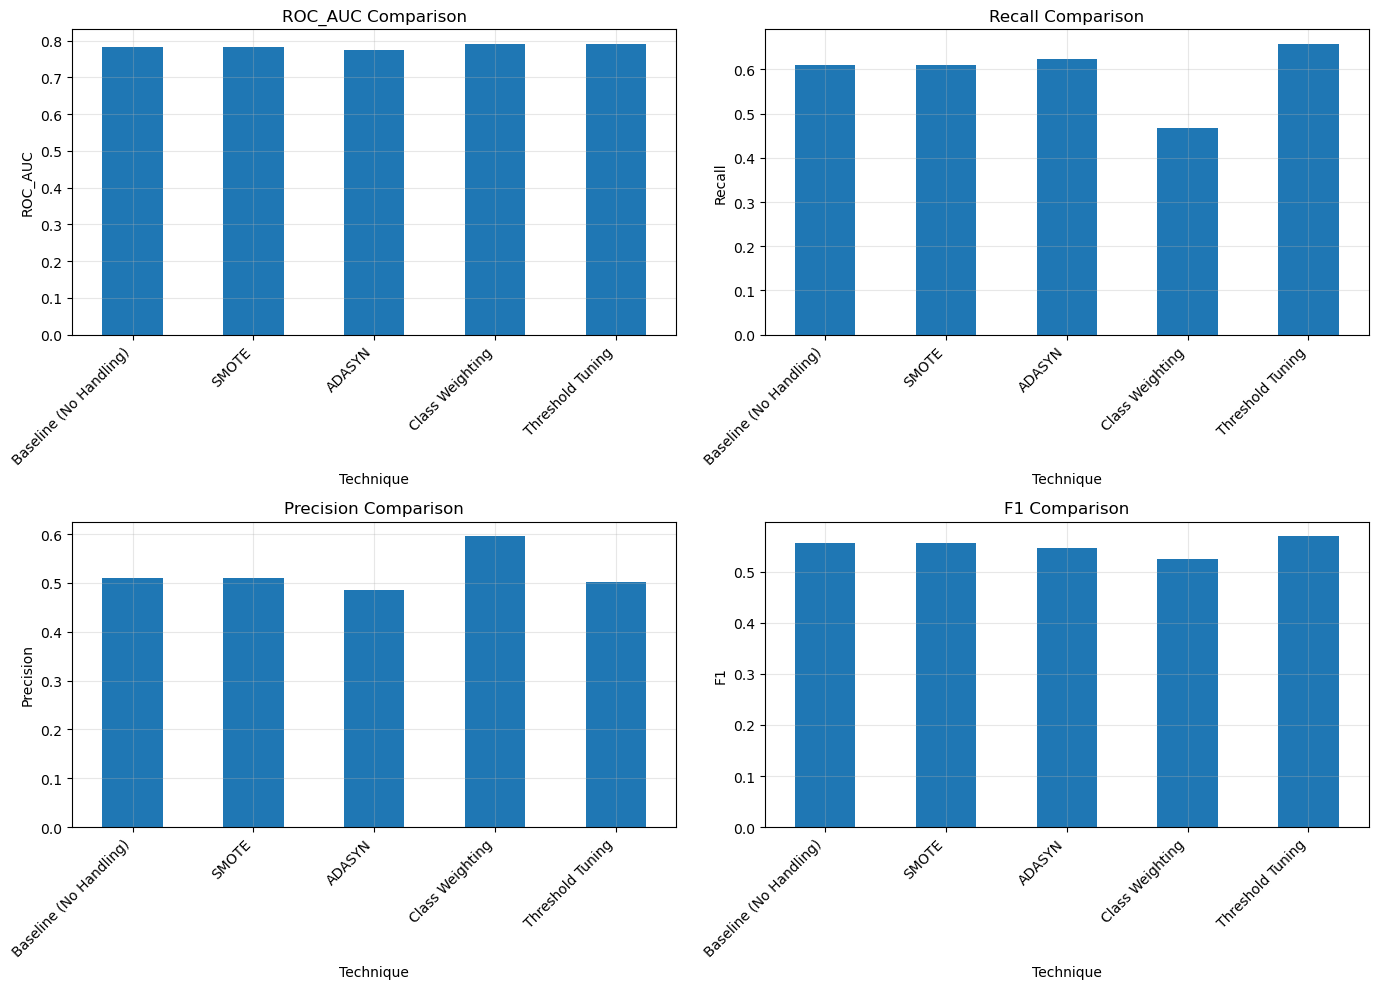


RECOMMENDATION FOR PRODUCTION


In [169]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, metric in enumerate(['ROC_AUC', 'Recall', 'Precision', 'F1']):
    ax = axes[idx // 2, idx % 2]
    comparison_results.plot(x='Technique', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== RECOMMENDATION =====
print("\n" + "=" * 70)
print("RECOMMENDATION FOR PRODUCTION")
print("=" * 70)

In [170]:
def evaluate_model(true, predicted):
    roc_auc = roc_auc_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true,predicted)
    F1_score = f1_score(true, predicted)
    return roc_auc,recall,precision,F1_score

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [180]:
X['TotalCharges']=X['TotalCharges'].fillna(0)

In [182]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

In [187]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Regressor": AdaBoostClassifier()
}
model_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_roc_auc , model_train_roc_auc, model_train_precision,model_train_f1_score = evaluate_model(y_train, y_train_pred)

    model_test_roc_auc , model_test_recall, model_test_precision,model_test_f1_score = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- ROC_AUC: {:.4f}".format(model_train_roc_auc))
    print("- Recall score: {:.4f}".format(model_train_roc_auc))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- ROC_AUC: {:.4f}".format(model_test_roc_auc))
    print("- MRecall score: {:.4f}".format(model_test_roc_auc))
    print("- Precision Score: {:.4f}".format(model_test_roc_auc))
    print("- F1 Score: {:.4f}".format(model_test_roc_auc))
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- ROC_AUC: 0.5408
- Recall score: 0.5408
- Precision Score: 0.6593
- F1 Score: 0.5942
----------------------------------
Model performance for Test set
- ROC_AUC: 0.7510
- MRecall score: 0.6005
- Precision Score: 0.6871
- F1 Score: 0.6409


K-Neighbors Classifier
Model performance for Training set
- ROC_AUC: 0.6163
- Recall score: 0.6163
- Precision Score: 0.7065
- F1 Score: 0.6583
----------------------------------
Model performance for Test set
- ROC_AUC: 0.6952
- MRecall score: 0.5255
- Precision Score: 0.5833
- F1 Score: 0.5529


Decision Tree
Model performance for Training set
- ROC_AUC: 0.9960
- Recall score: 0.9960
- Precision Score: 0.9987
- F1 Score: 0.9973
----------------------------------
Model performance for Test set
- ROC_AUC: 0.6320
- MRecall score: 0.4638
- Precision Score: 0.4553
- F1 Score: 0.4595


Random Forest Classifier
Model performance for Training set
- ROC_AUC: 0.9973
- Recall score: 0.9973
- Precision Sc

### Conclusion from above model evaluations: 
- Logistic Regression performs well on all key metrics
- It is most generalizable, least overfitting, best balance between recall and precision, best ranking ability
- Adaboost is next best performer
- Decision Tree, RandomForest, KNN are overfitting model, poor recall

# HyperParameter Tuning

In [ ]:
# === Hyperparameter tuning on already-transformed data ===
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import pandas as pd
import numpy as np
import time

# Models (use your chosen estimators)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Parameter grids adapted for direct estimator tuning (NO pipeline prefix)
param_grids = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy', 'log_loss'],
        # add other params if desired
    },
    "Random Forest": {
        'n_estimators': [8, 16, 32, 128, 256]
    },
    "Gradient Boosting": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'subsample': [0.6, 0.7, 0.75, 0.85, 0.9],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    },
    # Logistic: use list-of-dicts to avoid invalid penalty/solver combos
    "Logistic Regression": [
        {   # lbfgs supports l2 only
            "solver": ["lbfgs"],
            "penalty": ["l2"],
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "class_weight": [None, "balanced"],
            "max_iter": [200, 500]
        },
        {   # liblinear supports l1 and l2
            "solver": ["liblinear"],
            "penalty": ["l1", "l2"],
            "C": [0.001, 0.01, 0.1, 1, 10],
            "class_weight": [None, "balanced"],
            "max_iter": [200, 500]
        }
    ],
    "AdaBoost": {
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }
}

# CV / scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = "roc_auc"

results = []

# Helper to obtain probabilities/scores for AUC
from sklearn.preprocessing import MinMaxScaler
def get_proba_or_score(estimator, X):
    # prefer predict_proba, else decision_function scaled to [0,1], else None
    if hasattr(estimator, "predict_proba"):
        try:
            return estimator.predict_proba(X)[:, 1]
        except Exception:
            pass
    if hasattr(estimator, "decision_function"):
        try:
            scores = estimator.decision_function(X)
            return MinMaxScaler().fit_transform(scores.reshape(-1, 1)).ravel()
        except Exception:
            pass
    return None

# Main loop: GridSearch + evaluate
for name, base_estimator in models.items():
    print("\n" + "="*80)
    print(f"Processing model: {name}")
    start_time = time.time()
    try:
        estimator = clone(base_estimator)
        param_grid = param_grids.get(name, {})
        
        gs = GridSearchCV(
            estimator,
            param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            verbose=1,
            refit=True
        )
        
        # Fit on TRANSFORMED training data
        gs.fit(X_train_transformed, y_train)
        
        best = gs.best_estimator_
        best_params = gs.best_params_
        best_cv_score = gs.best_score_
        
        # Predictions
        y_train_pred = best.predict(X_train_transformed)
        y_test_pred  = best.predict(X_test_transformed)
        
        y_train_proba = get_proba_or_score(best, X_train_transformed)
        y_test_proba  = get_proba_or_score(best, X_test_transformed)
        
        train_roc = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else np.nan
        test_roc  = roc_auc_score(y_test,  y_test_proba)  if y_test_proba is not None else np.nan
        
        train_recall = recall_score(y_train, y_train_pred)
        test_recall  = recall_score(y_test,  y_test_pred)
        train_precision = precision_score(y_train, y_train_pred)
        test_precision  = precision_score(y_test,  y_test_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1  = f1_score(y_test,  y_test_pred)
        
        # Print results
        print(f"\nBest CV (roc_auc): {best_cv_score:.4f}")
        print("Best params:", best_params)
        
        print("\nTrain metrics:")
        print(f" - ROC-AUC: {train_roc:.4f}" if not np.isnan(train_roc) else " - ROC-AUC: n/a")
        print(f" - Recall: {train_recall:.4f}")
        print(f" - Precision: {train_precision:.4f}")
        print(f" - F1: {train_f1:.4f}")
        
        print("\nTest metrics:")
        print(f" - ROC-AUC: {test_roc:.4f}" if not np.isnan(test_roc) else " - ROC-AUC: n/a")
        print(f" - Recall: {test_recall:.4f}")
        print(f" - Precision: {test_precision:.4f}")
        print(f" - F1: {test_f1:.4f}")
        
        print("\nClassification report (test):")
        print(classification_report(y_test, y_test_pred))
        print("Confusion matrix (test):")
        print(confusion_matrix(y_test, y_test_pred))
        
        elapsed = time.time() - start_time
        print(f"Elapsed time: {elapsed:.1f}s")
        
        results.append({
            "model": name,
            "best_cv_roc_auc": best_cv_score,
            "test_roc_auc": test_roc,
            "test_recall": test_recall,
            "test_precision": test_precision,
            "test_f1": test_f1,
            "best_params": best_params,
            "elapsed_s": elapsed
        })
        
    except Exception as e:
        print(f"ERROR for model {name}: {e}")
        results.append({"model": name, "error": str(e)})

# Summary DataFrame
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="test_roc_auc", ascending=False, na_position='last').reset_index(drop=True)

print("\n" + "="*80)
print("Summary of all tuned models (sorted by test ROC-AUC):")
display(results_df_sorted)

print("\nConcise table:")
print(results_df_sorted[["model","test_roc_auc","test_recall","test_precision","test_f1","elapsed_s"]].round(4))



Processing model: Random Forest
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best CV (roc_auc): 0.8200
Best params: {'n_estimators': 256}

Train metrics:
 - ROC-AUC: 1.0000
 - Recall: 0.9980
 - Precision: 0.9967
 - F1: 0.9973

Test metrics:
 - ROC-AUC: 0.8419
 - Recall: 0.4611
 - Precision: 0.6641
 - F1: 0.5443

Classification report (test):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Confusion matrix (test):
[[949  87]
 [201 172]]
Elapsed time: 12.9s

Processing model: Decision Tree
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best CV (roc_auc): 0.6561
Best params: {'criterion': 'gini'}

Train metrics:
 - ROC-AUC: 1.0000
 - Recall: 0.9960
 - Precision: 0.9987
 - F1: 0.9973

